# <center>Project: Beware Bunnies</center>

### Michael Salamon, Dor Ulman, Nahin Imtiaz, Asma Sadia

##### CSC 59866 Senior Design Project I - Applied Machine Learning
##### The City College of New York

---

## Table of Contents:
* [Introduction ](#part-0)
    * [Summary of the datasets ](#part-1)
    * [Additional Questions](#part-2)
* [Data Exploration](#part-3a)
* [More Data Exploration](#part-3)
    * [Occurence](#part-4)
    * [Abundance](#part-5)
* [Data Cleaning](#part-6)
* [Data Modeling](#part-7)
    * [Linear Regression](#part-8)
    * [Logistic Regression](#part-9)
    * [Random Forest Classifier](#part-10)
    * [3 Neural Network](#part-11)
    * [Decision Tree](#part-12)

* [Conclusion](#part-12)

# Introduction <a id="part-0"></a>

## Report  

-          **What is the problem that you’re solving? Who are you solving it for?**

    > Invasive species are defined as "... any kind of living organism... that is not native to an ecosystem and causes harm. They can harm the environment, the economy, or even human health" *(The National Wildlife Federation 12)*. Although the European Rabbit is not a predator, its effects on Australia over the decades have been enormous: "Today, the European rabbit occupies >70% of the Australian continent (Stodart & Parer 1988), suppressing the regeneration of native vegetation (Forsyth et al. 2015), competing with native and domestic mammals for food and habitat (Moseby et al. 2009, Bird et al. 2012), sustaining inflated populations of invasive predators (Lurgi et al. 2018, but see Scroggie et al. 2018), and causing approximately 200 million [dollars] per year of associated economic losses (Gong 2009, Cooke 2013)" *(Roy-Dufresne 2)*. Rabbits have led to desertification and crop destruction. Given the scope of this problem, what is the solution? Although not the most convenient answer "Most scientists agree that the most effective way to thwart further invasions of exotic species and contribute to the protection of biodiversity is to prevent the new species introductions in the first place" *(Rafferty 1)*. However, due to globalization and the few amount of animals needed to grow out of control, this advice is not the most useful. Regulation of invasive species is the solution if preventive measures fail. "The Department [of Environmental Conservation] also performs assessments to categorize and quantify the 'invasiveness' of non-native species and their social and economic implications. These assessments allow the Department to control the spread of non-native species through regulation. Further, the Department actively participates in early detection methods, such as trap checking and other forms of direct observation, to identify specific forest-related TIS [terrestrial invasive species]" *(Department of Environmental Conservation 24)*. Having an accurate ML model can help Departments make informed decisions on when to regulate a population either by use of specially trained dogs or distribution of virus-laced rabbit food in the wild *(ABC Australia Video 7:25)*. Predicting the growth rate and regions of the invasive species will allow the Australian government to allocate means efficiently in order to regulate the European Rabbit population. The model should be accurate enough for helping the Australian continent to send resources to areas with far too many rabbits to regulate the population to give time for vegetation/ecosystem to grow back.
    
    > References:  
    >            Department of Environmental Conservation. "Management of Invasive Species". Albany, NY: Office of the New York State Comptroller, 23 July 2020. Web. 8 May 2021. [https://www.osc.state.ny.us/state-agencies/audits/2020/07/23/management-invasive-species]
    >            Rafferty, John. "Invasive Species - Solutions". Chicago, IL: Britannica. n.d. Web. 8 May 2021. [https://www.britannica.com/science/invasive-species/Solutions]  
    >            Roy-Dufresne, Emilie et al. The Australian National Rabbit Database: 50 years of population monitoring of an invasive species. Australia: University of Adelaide, 29 Apr. 2019.
    >            The National Wildlife Federation. "Invasive Species". Vermont: The National Wildlife Federation, n.d. Web. 8 May 2021. [https://www.nwf.org/Educational-Resources/Wildlife-Guide/Threats-to-Wildlife/Invasive-Species#:~:text=An%20invasive%20species%20can%20be,economy%2C%20or%20even%20human%20health]      
    >            "160 year battle against one of Australia's worst invasives 🐇 | Meet the Ferals Ep 6 | ABC Australia". ABC Australia Video. Youtube, 14 Feb 2020. Video file. Web. 8 May 2021. [https://www.youtube.com/watch?v=778Da7NCF6s]  
    
-          **What are potential features, whether already built or that you’ll need to make? What is your target variable?**  

	> Potential features (from abundance dataset):  
    > - *Season* - measurement of time.  
    > - *Year* - measurement of time.  
    > - *DistPermWater* - Euclidean weighted distance to permanent water features (km)  
    > - *DistAgrilLand* - Euclidean distance to agricultural land margins (km)  
    > - *Location* - Longitude and latitude (maybe also state?)  
    > Target variable:  
    > - *RabbitsPerKm* - Avg. number of rabbits spotted per km


-          **What transformations will you need to perform on your input data?**  

    > While looking at the datasets statistics (using .describe() on the data frame), some rows are missing data and will probably be removed. For example, in both datasets, columns ‘Month’ and ‘Day’ are missing values which are crucial for finding accurate trends of rabbit’s population growth over time. In addition, taking into consideration the accuracy of collected data, meaning filtering data that was not accurately collected - “QA_Accuracy” which is the ‘quality assessment of the data accuracy’.


-          **What modeling approach(es) will you use for your problem? Is this classification or regression?** 

    > This is a regression forecasting problem. The models used for such problems include Linear Regression, LSTM, RNN, and univariate AREMA.


-          **How will you evaluate your model’s performance? This should be in terms of quantitative metrics, qualitative evaluation, and visualizations.**

    > Take a basline model from the year before and compare with the prediction.


## Summary of the datasets  <a id="part-1"></a>

> "Here we provide the Australian National Rabbit Database (ANRD) which combines over 50 years of 
rabbit occurrence and abundance survey data from across Australia. The database collates
information from > 120 studies across all states and territory administrative divisions of the 
Commonwealth of Australia into a rigorous, consistent, and unified framework, eliminating potential
disparities resulting from the multiple monitoring and reporting methods used for data collection. 
This is one of the largest compilations of data on an invasive species, providing an important
resource for determining drivers of patterns of variation in rabbit occupancy, abundance and
population growth at spatial scales ranging from local to continental" *(Roy-Dufresne 5)*. Roy-Dufresne's 
study will be constantly referenced throughout this notebook to add context to our analysis. We will 
be using ANRD. This database is broken down into two datasets, 'SI1_DataOccurrence.csv' and 
'SI2_DataAbundance.csv'. These .csv's were converted to .zip files and uploaded to the GitHub repository.

> Occurence dataset is sightings of rabbits by various means. This ranges between accounts from experts, active citizens, and people around warren locations. A warren is an area that rabbits congregate and dig tunnels. 90% of rabbit sightings in this dataset are from people around warren locations *(Roy-Dufresne 5)*.

> Abundance dataset is sightings of rabbits by transects. A transect is a trail a couple km's in length. Researchers go through the trail at night, drive a car slowly while directing flashlights on the sides of the transect. The number of rabbits spotted per km is recorded. There are different transect so each transect has an id.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import qa_tc_explore, QA_Slice 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,classification_report
import shap

> 99% of the data in occurence takes place in the past 35 years. (Roy-Dufresne 6)

In [2]:
occurence = pd.read_csv('SI1_DataOccurrence.zip')
occurence

,Occurrence_ID,AustraliaUTMGrid10Km_ID,AustraliaUTMGrid10Km_Lat,AustraliaUTMGrid10Km_Long,ResolutionQuality,TotalNbOccurrencesPerUTMGrid,PtsIntensityEstimate_AllDataPerUTMGrid,PtsIntensityEstimate_OneDataPerUTMGrid,AustraliaState,DataType,...,A_Prec_AvgAutumn30Yr,A_Prec_AvgSummer30Yr,A_Prec_AvgSpring30Yr,A_Prec_AvgWinter30Yr,VegeType,DistPermWater,DistAgriLand,PercSoilClay,MinDayLength,VarDayLength
0,1,55H1782,-34.95,148.15,Less_than_5km,8,0.23,0.90,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,11.0,1.48,7.32,16.33,9.8,2.63
1,2,55H1782,-34.95,148.15,Less_than_5km,8,0.23,0.90,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,11.0,1.48,7.32,16.33,9.8,2.63
2,3,55H1782,-34.95,148.15,Less_than_5km,8,0.23,0.90,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,11.0,1.48,7.32,16.33,9.8,2.63
3,4,55H1782,-34.95,148.15,Less_than_5km,8,0.23,0.90,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,11.0,1.48,7.32,16.33,9.8,2.63
4,5,55H1782,-34.95,148.15,Less_than_5km,8,0.23,0.90,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,11.0,1.48,7.32,16.33,9.8,2.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689260,689281,56K4693,-23.85,151.25,More_than_15km,1,0.01,0.21,SA,Expert_Observation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689261,689282,50H1833,-35.00,117.29,More_than_15km,3,0.00,0.14,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689262,689283,56H0842,-33.45,150.15,More_than_15km,25,0.11,0.74,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689263,689284,55H0350,-32.55,148.95,More_than_15km,3,0.16,0.80,WA,Expert_Observation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
abundance = pd.read_csv('SI2_DataAbundance.zip', low_memory=False)
abundance

,SpotData_ID,AustraliaUTMGrid10Km_ID,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat,ResolutionQuality,TotalNbTransectsPerUTMGrid,AustraliaState,StudyRegions_ID,DataSourceEntry_ID,DataSourceName,...,A_Prec_AvgAutumn30Yr,A_Prec_AvgSummer30Yr,A_Prec_AvgSpring30Yr,A_Prec_AvgWinter30Yr,VegeType,DistPermWater,DistAgriLand,PercSoilClay,MinDayLength,VarDayLength
0,1,55H0894,149.35,-33.45,Less_than_5km,3,NSW,3801,AUS_Published_Spot_001,AUS_Published_Spotlight,...,50.32,74.79,68.15,64.75,11,0.44,1.61,15.83,9.93,2.35
1,2,55H0412,149.15,-32.65,Less_than_5km,4,NSW,3805,AUS_Published_Spot_002,AUS_Published_Spotlight,...,49.00,67.26,61.46,49.31,12,1.19,2.23,18.05,10.00,2.20
2,3,56J3074,151.35,-29.15,Less_than_5km,2,QLD,3850,AUS_Published_Spot_003,AUS_Published_Spotlight,...,44.16,89.25,63.26,35.91,11,0.85,3.08,22.72,10.28,1.66
3,4,56J3074,151.35,-29.15,Less_than_5km,2,QLD,3850,AUS_Published_Spot_004,AUS_Published_Spotlight,...,44.16,89.25,63.26,35.91,11,0.85,3.08,22.72,10.28,1.66
4,5,56J1025,150.45,-25.75,Less_than_5km,2,QLD,3851,AUS_Published_Spot_005,AUS_Published_Spotlight,...,41.66,84.77,54.33,28.62,11,2.02,16.28,42.96,10.53,1.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51236,51237,54J4747,138.65,-31.95,Between_10km_and_15km,1,SA,3720,Yednalue_33,SA_YednalueVenus,...,22.39,27.30,31.59,31.74,4,4.52,14.11,28.91,10.06,2.09
51237,51238,54J4747,138.65,-31.95,Between_10km_and_15km,1,SA,3720,Yednalue_34,SA_YednalueVenus,...,22.39,27.30,31.59,31.74,4,4.52,14.11,28.91,10.06,2.09
51238,51239,54J4747,138.65,-31.95,Between_10km_and_15km,1,SA,3720,Yednalue_35,SA_YednalueVenus,...,22.39,27.30,31.59,31.74,4,4.52,14.11,28.91,10.06,2.09
51239,51240,54J4747,138.65,-31.95,Between_10km_and_15km,1,SA,3720,Yednalue_36,SA_YednalueVenus,...,22.39,27.30,31.59,31.74,4,4.52,14.11,28.91,10.06,2.09


In [4]:
# Listing the dataset columns
occurence.columns

Index(['Occurrence_ID', 'AustraliaUTMGrid10Km_ID', 'AustraliaUTMGrid10Km_Lat',
       'AustraliaUTMGrid10Km_Long', 'ResolutionQuality',
       'TotalNbOccurrencesPerUTMGrid',
       'PtsIntensityEstimate_AllDataPerUTMGrid',
       'PtsIntensityEstimate_OneDataPerUTMGrid', 'AustraliaState', 'DataType',
       'DataSourceEntry_ID', 'DataSourceName', 'DataSourceSiteSectionName',
       'Year', 'Month', 'Day', 'Season', 'QA_Accuracy', 'A_Prec_Avg30Yr',
       'A_Psea_Avg30Yr', 'A_TAvg_Avg30Yr', 'A_TMax_Avg30Yr', 'A_TMin_Avg30Yr',
       'A_TSea_Avg30Yr', 'A_TWet_Avg30Yr', 'A_TWrm_Avg30Yr',
       'A_Prec_AvgAutumn30Yr', 'A_Prec_AvgSummer30Yr', 'A_Prec_AvgSpring30Yr',
       'A_Prec_AvgWinter30Yr', 'VegeType', 'DistPermWater', 'DistAgriLand',
       'PercSoilClay', 'MinDayLength', 'VarDayLength'],
      dtype='object')

In [5]:
# Listing the datatypes of each column
occurence.dtypes.value_counts()

float64    27
object      7
int64       2
dtype: int64

In [6]:
abundance.columns

Index(['SpotData_ID', 'AustraliaUTMGrid10Km_ID', 'AustraliaUTMGrid10Km_Long',
       'AustraliaUTMGrid10Km_Lat', 'ResolutionQuality',
       'TotalNbTransectsPerUTMGrid', 'AustraliaState', 'StudyRegions_ID',
       'DataSourceEntry_ID', 'DataSourceName', 'DataSourceSiteSectionName',
       'VisitNb', 'TotalNbReplicates', 'Year', 'Month', 'Day', 'Season',
       'Transect_ID', 'TransectWidth', 'TransectLength', 'RabbitsPerKm',
       'UncertaintyManagementNotes', 'QA_Accuracy', 'QA_Completeness',
       'QA_TemporalCoverage', 'QA_Consistency', 'D_Prec', 'D_Prec_30DaysLag',
       'M_Prec', 'M_Prec_12PreMonths', 'M_Prec_24PreMonths',
       'M_Prec_2PresSeasons', 'A_Prec', 'A_Prec_1YrLag', 'A_Prec_2YrLag',
       'A_Psea', 'A_Psea_1YrLag', 'A_Psea_2YrLag', 'D_Tmax', 'D_Tmin',
       'M_TAvg_PreSummer', 'M_TAvg_PreWinter', 'A_AvgTMaxWarmestMonth',
       'A_AvgTMaxWarmestMonth_1YrLag', 'A_AvgTMinColdestMonth',
       'A_AvgTMinColdestMonth_1YrLag', 'A_Prec_Avg30Yr', 'A_Psea_Avg30Yr',
    

In [7]:
# Listing the datatypes of each column
abundance.dtypes.value_counts()

float64    47
object     10
int64       7
dtype: int64

In [8]:
# Overview of statistics of the occurence dataset
occurence.describe()

,Occurrence_ID,AustraliaUTMGrid10Km_Lat,AustraliaUTMGrid10Km_Long,TotalNbOccurrencesPerUTMGrid,PtsIntensityEstimate_AllDataPerUTMGrid,PtsIntensityEstimate_OneDataPerUTMGrid,Year,Month,Day,Season,...,A_Prec_AvgAutumn30Yr,A_Prec_AvgSummer30Yr,A_Prec_AvgSpring30Yr,A_Prec_AvgWinter30Yr,VegeType,DistPermWater,DistAgriLand,PercSoilClay,MinDayLength,VarDayLength
count,689265.000000,689265.000000,689265.000000,689265.000000,689265.000000,689265.000000,672491.000000,663609.000000,619017.000000,662196.000000,...,649970.000000,649970.000000,649970.000000,649970.000000,688138.000000,688192.000000,688192.000000,688187.000000,688218.000000,688218.000000
mean,344634.160893,-34.024533,140.060762,44617.545375,0.862699,0.784935,2006.903548,4.855558,16.056586,2.235945,...,26.837895,27.838683,37.351001,38.334278,9.120894,3.897174,21.990139,25.285854,9.877882,2.477478
std,198975.628600,2.007720,3.253958,35380.316340,0.257677,0.097632,6.011869,2.953220,9.097762,0.906756,...,13.824578,14.454527,14.228456,17.741774,3.150844,5.360618,80.580640,6.108147,0.169346,0.368136
min,1.000000,-43.490000,113.050000,1.000000,0.000000,0.020000,1760.000000,0.000000,1.000000,1.000000,...,8.110000,5.310000,0.850000,1.230000,1.000000,0.000000,0.000000,5.000000,8.950000,0.250000
25%,172317.000000,-34.150000,139.050000,5779.000000,0.960000,0.770000,2007.000000,3.000000,9.000000,2.000000,...,18.710000,22.250000,27.680000,24.450000,10.000000,1.780000,1.570000,20.900000,9.870000,2.310000
50%,344633.000000,-34.150000,139.150000,45089.000000,0.980000,0.780000,2009.000000,4.000000,13.000000,2.000000,...,22.840000,23.520000,32.780000,35.970000,11.000000,3.360000,6.760000,28.100000,9.870000,2.480000
75%,516949.000000,-33.250000,139.450000,69866.000000,1.000000,0.800000,2009.000000,7.000000,24.000000,3.000000,...,29.750000,24.230000,42.730000,48.520000,11.000000,4.010000,20.240000,29.990000,9.950000,2.480000
max,689285.000000,-12.350000,153.650000,104045.000000,1.000000,1.000000,2015.000000,30.000000,31.000000,4.000000,...,447.450000,474.840000,251.570000,286.800000,13.000000,170.370000,915.020000,57.550000,11.400000,4.940000


In [9]:
# Overview of statistics of the abundance dataset
abundance.describe()

,SpotData_ID,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat,TotalNbTransectsPerUTMGrid,StudyRegions_ID,VisitNb,TotalNbReplicates,Year,Month,Day,...,A_Prec_AvgAutumn30Yr,A_Prec_AvgSummer30Yr,A_Prec_AvgSpring30Yr,A_Prec_AvgWinter30Yr,VegeType,DistPermWater,DistAgriLand,PercSoilClay,MinDayLength,VarDayLength
count,51241.000000,51241.000000,51241.000000,51241.000000,51241.000000,51241.000000,51241.000000,51214.000000,45754.000000,44565.000000,...,48687.000000,48687.000000,48687.000000,48687.000000,51241.000000,51241.000000,51241.000000,51241.000000,51241.000000,51241.000000
mean,25621.000000,139.446311,-35.493201,25.495911,14252.725337,16.832810,1.999219,2000.630628,6.640359,15.272635,...,42.637415,39.350071,52.176293,60.147965,8.856658,3.739985,32.049651,18.923074,9.736499,2.835243
std,14792.146909,10.155581,3.771567,20.404179,29585.293853,24.548531,0.705421,9.001740,3.457822,8.712367,...,19.932521,19.228277,25.149581,33.800933,3.512874,5.408652,113.835489,7.780317,0.329687,0.757181
min,1.000000,114.950000,-43.250000,1.000000,1.000000,1.000000,1.000000,1965.000000,1.000000,1.000000,...,10.500000,9.240000,10.040000,7.390000,1.000000,0.010000,0.070000,5.000000,8.970000,0.930000
25%,12811.000000,138.750000,-37.650000,7.000000,3745.000000,5.000000,2.000000,1998.000000,4.000000,8.000000,...,27.060000,24.660000,30.910000,40.440000,7.000000,0.380000,0.900000,14.720000,9.560000,2.360000
50%,25621.000000,143.250000,-36.150000,25.000000,4396.000000,10.000000,2.000000,2000.000000,6.000000,15.000000,...,42.070000,36.390000,53.420000,54.540000,11.000000,2.100000,2.240000,18.080000,9.690000,2.880000
75%,38431.000000,145.550000,-33.550000,35.000000,4436.000000,20.000000,2.000000,2008.000000,10.000000,22.000000,...,51.600000,49.960000,65.370000,70.650000,11.000000,5.210000,11.330000,24.420000,9.920000,3.220000
max,51241.000000,152.650000,-22.750000,84.000000,149692.000000,227.000000,9.000000,2015.000000,12.000000,31.000000,...,149.300000,158.550000,175.660000,227.980000,12.000000,52.940000,716.450000,50.000000,10.740000,4.870000


## Additional Questions  <a id="part-2"></a>

### Any first impressions of the datasets?    
> Abundance has nearly double the amount of features compared to Occurence. Nearly all of the additional features are weather features. Are the 30Yr weather features sufficient as inputs to our model or will we also use all these new weather features? When we clearly define all of the weather features, we can better answer this question. Aside from this, nothing sticks out in describe().

### Does each row say exactly how many rabbits were spotted?
> The paper mentions that in the Abundance dataset, yes. It is in the variable RabbitsPerKm. There appears to be no precise number feature for the occurence dataset. Its just that a person saw a rabbit(s).


### Any features that don't make sense?
> The QA variables are a little more difficult to understand. They assess the accuracy of each observation. A lot of detail given to these features in the paper. --RESOLVED-- QA variables allow us to see if a transect was traversed many times per year, throughout the seasons, throughout many years. It allows us to construct a reliable dataset.


### How will we determine population growth?
> Although the original goal was to determine population growth,  this is a strict metric. Since each occurence is a daily sighting of rabbit(s), the same rabbit may be spotted on two separate days. However, after speaking w/ the professor, we can assume each sighting is a unique rabbit. As he put it, "More rabbit sightings means a greater number of unique rabbits sightings".
At its most basic level, a population growth model is as such:
The input variables are Year and Season. The target variable is 'total occurences' for that year in that season. This variable 
must be created and calculated in the abundance dataset.Later on in our project, we'll take into account weather variables,
certain parts of Australia, and distance to geographic features.


### How will latitude longitude coordinates be utilized?
> --UPDATE-- Earlier on while working on this project, we worked w/ a granularity of UTMID and transectID. However, as you will see later in this notebook, it had issues. Lat and Long coordinates will be used for inputs instead.

# Data Exploration <a id="part-3a"></a>

In [10]:
abundance['Transect_ID'].nunique()

308

> **Anecdote:**  
> For some reason, the study insists there are "...1,858 transects (i.e. 305 grids)..." *(Roy-Dufresne 8)* 
> but yet in the cell above it shows 308 unique transect ids? 
> Furthermore, it says...  
>> "18 - Transect_ID - Factor - Unique ID given to each transect as defined by the data provider" *(Roy-Dufresne 36)*  

> I guess we can ignore the 1858. Its not like there's any problem w/ 308. Just weird that info conflicts a bit.

In [11]:
# Occurence dataset weather features (A_ -> Annual, M_ -> Month, D_ -> Day):
# 'A_Prec_Avg30Yr'       - Total rainfall (unit for precipitation is mm)
# 'A_Psea_Avg30Yr'       - Rainfall seasonality 
# 'A_TAvg_Avg30Yr'       - Avg temperature (unit for temperature is °C)
# 'A_TMax_Avg30Yr'       - Maximum temperature
# 'A_TMin_Avg30Yr'       - Minimum temperature
# 'A_TSea_Avg30Yr'       - Temperature seasonality
# 'A_TWet_Avg30Yr'       - Avg temperature of the wettest quarter
# 'A_TWrm_Avg30Yr'       - Avg temperature of the warmest quarter
# 'A_Prec_AvgAutumn30Yr' - Avg rainfall for Autumn
# 'A_Prec_AvgSummer30Yr' - Avg rainfall for Summer
# 'A_Prec_AvgSpring30Yr' - Avg rainfall for Spring
# 'A_Prec_AvgWinter30Yr' - Avg rainfall for Winter

# Abundance dataset weather features:
# 'D_Prec'                       - Avg Rainfall For the Same Day
# 'D_Prec_30DaysLag'             - Avg Rainfall For 30 Days Before the Sampling Date
# 'M_Prec'                       - Avg Rainfall For the Same Month of the Sampling Date
# 'M_Prec_12PreMonths'           - Avg Rainfall For the Same Month of the Sampling Date (1-year time lag)
# 'M_Prec_24PreMonths'           - Avg Rainfall For the Same Month of the Sampling Date (2-year time lag)
# 'M_Prec_2PresSeasons'          - Avg rainfall of the two previous seasons
# 'A_Prec'                       - Avg rainfall for the same year of the sampling date
# 'A_Prec_1YrLag'                - Avg rainfall for the same year of the sampling date (1-year time lag)
# 'A_Prec_2YrLag'                - Avg rainfall for the same year of the sampling date (2-year time lag)
# 'A_Psea'                       - Seasonal average rainfall for the current year of the data sampling 
# 'A_Psea_1YrLag'                - Seasonal average rainfall for the current year of the data sampling (1-year time lag) 
# 'A_Psea_2YrLag'                - Seasonal average rainfall for the current year of the data sampling (2-year time lag)
# 'D_Tmax'                       - Avg maximum temperature for the same day of the sampling date
# 'D_Tmin'                       - Avg minimum temperature for the same day of the sampling date 
# 'M_TAvg_PreSummer'             - Avg temperature for the previous summer season 
# 'M_TAvg_PreWinter'             - Avg temperature for the previous winter season
# 'A_AvgTMaxWarmestMonth'        - Avg maximum temperature for the warmest month for the same year the samplingdate
# 'A_AvgTMaxWarmestMonth_1YrLag' - Avg maximum temperature for the warmest month for the same year the samplingdate(1-y lag)
# 'A_AvgTMinColdestMonth'        - Avg minimum temperature for the coldest month for the same year the samplingdate 
# 'A_AvgTMinColdestMonth_1YrLag' - Avg minimum temperature for the coldest month for the same year the samplingdate(1-y lag)
# 'A_Prec_Avg30Yr'       - Total rainfall 
# 'A_Psea_Avg30Yr'       - Rainfall seasonality 
# 'A_TAvg_Avg30Yr'       - Average temperature
# 'A_TMax_Avg30Yr'       - Maximum temperature
# 'A_TMin_Avg30Yr'       - Minimum temperature
# 'A_TSea_Avg30Yr'       - Temperature seasonality
# 'A_TWet_Avg30Yr'       - Avg temperature of the wettest quarter
# 'A_TWrm_Avg30Yr'       - Avg temperature of the warmest quarter
# 'A_Prec_AvgAutumn30Yr' - Avg rainfall for Autumn
# 'A_Prec_AvgSummer30Yr' - Avg rainfall for Summer
# 'A_Prec_AvgSpring30Yr' - Avg rainfall for Spring
# 'A_Prec_AvgWinter30Yr' - Avg rainfall for Winter

> **Explanation:**  
Each weather feature summary is extrapolated from the study (Roy-Dufresne 22,37-40). All the weather data is classified as: Daily, Monthly, Seasonal, Annual, and 30 years. Any other weather features are lagged versions of existing weather features.
We should focus on the seasonal and annual weather features for our model.

In [12]:
# 8 states that make up Australia
# NSW - New South Wales
# ACT - Australian Capital Territory
# NT  - Northern Territory
# QLD - Queensland
# SA  - South Australia
# VIC - Victoria
# WA  - Western Australia
# TAS - Tasmania

# 51241 is the total rows in abundance
#  is the total rows in occurence

print('AustraliaState:', occurence['AustraliaState'].nunique())
print('Queensland accounts for', occurence[occurence['AustraliaState']=='QLD'].shape[0]/689265*100,"% of the rows in occurence")
print('Victoria accounts for', occurence[occurence['AustraliaState']=='VIC'].shape[0]/689265*100,"% of the rows in occurence")
print('Western Australia accounts for', occurence[occurence['AustraliaState']=='WA'].shape[0]/689265*100,"% of the rows in occurence")

print('\n')

print('AustraliaState:', abundance['AustraliaState'].nunique())
print('Victoria accounts for', abundance[abundance['AustraliaState']=='VIC'].shape[0]/51241*100,"% of the rows in abundance")
print('Western Australia accounts for', abundance[abundance['AustraliaState']=='WA'].shape[0]/51241*100,"% of the rows in abundance")
print('Tasmania accounts for', abundance[abundance['AustraliaState']=='TAS'].shape[0]/51241*100,"% of the rows in abundance")

print('\n')

print('AustraliaUTMGrid10Km_ID occurence:', occurence['AustraliaUTMGrid10Km_ID'].nunique())
print('AustraliaUTMGrid10Km_ID abundance:', abundance['AustraliaUTMGrid10Km_ID'].nunique())

AustraliaState: 8
Queensland accounts for 78.86690895374058 % of the rows in occurence
Victoria accounts for 15.346782442166656 % of the rows in occurence
Western Australia accounts for 2.6673340442355262 % of the rows in occurence


AustraliaState: 8
Victoria accounts for 50.75818192463066 % of the rows in abundance
Western Australia accounts for 16.808805448761735 % of the rows in abundance
Tasmania accounts for 10.249604808649323 % of the rows in abundance


AustraliaUTMGrid10Km_ID occurence: 9839
AustraliaUTMGrid10Km_ID abundance: 302


> **Observation I:**  
As you can see in the results above, the occurence dataset has one benefit over abundance... the sightings occur in more areas of Australia! This makes sense since transects are limited. The sighting distribution of the occurence dataset *(Roy-Dufresne 8)* covers more areas in Australia compared with the sighting distribution of the abundance dataset *(Roy-Dufresne 11)*. However, we can justify this since the Rabbit population is not evenly distributed across Australia. Since there is higher rabbit density in Tasmania, Victoria, and Western Australia, the transects should be concentrated in these areas which is the case for the abundance dataset. A region like Queensland has sightings sparsed evenly throughout the region, and accounts for 80% of sightings in occurence, but is non-existant in abundance. Why wouldn't transects be built in Queensland? Some reasons can include that a large portion of the Australian human population is concentrated on the shores of Tasmania, Victoria, and Western Australia. The transects are located close to where the researchers live. Furthermore, Tasmania + Victoria + edge of Western Australia is where most Australian forest land is concentrated. Researchers find it more interesting to put transects in these biodiverse areas.

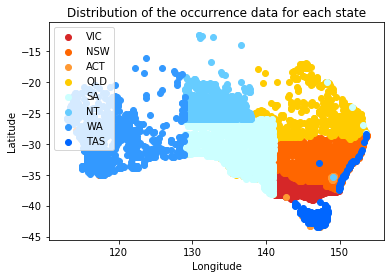

In [13]:
# Below is graph proof of our statement:

# states is different from legend ordering. This is to get the ideal map.
states=['VIC','WA','TAS','SA','QLD','ACT','NT','NSW']
colors=['#d62728','#ff6600','#ff9933','#ffcc00','#ccffff','#66ccff','#3399ff','#0066ff']

for i in range(0,8):
    temp= occurence[occurence['AustraliaState']== states[i]]
    mean_occurence = temp.groupby(['AustraliaUTMGrid10Km_Lat', 'AustraliaUTMGrid10Km_Long'], as_index=False).mean()
    plt.scatter(mean_occurence['AustraliaUTMGrid10Km_Long'],mean_occurence['AustraliaUTMGrid10Km_Lat'], color=colors[i])

plt.title('Distribution of the occurrence data for each state')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(['VIC','NSW','ACT','QLD','SA','NT','WA','TAS'])
plt.show()

> **Observation II:**  
This is crazy, but that labels they have for states is wrong. Referring to a colored map with an equivalent legend *(Roy-Dufresne 8)*, the only way to get a similar looking map is using the following correspondence:  
'VIC' is labeled as 'VIC'.  
'NSW' is labeled as 'WA'.  
'ACT' is labeled as 'TAS'.  
'QLD' is labeled as 'SA'.  
'SA' is labeled as 'QLD'.  
'NT' is labeled as 'ACT'.  
'WA' is labeled as 'NT'.  
'TAS' is labeled as 'NSW'.  
I have to do the correct translation from here on out when referring to occurence.  
Update the top 3 states in occurence with correct labeling. Check if abundance has correct corespondence.

In [14]:
print('AustraliaState:', occurence['AustraliaState'].nunique())
print('South Australia accounts for', occurence[occurence['AustraliaState']=='QLD'].shape[0]/689265*100,"% of the rows in occurence")
print('Victoria accounts for', occurence[occurence['AustraliaState']=='VIC'].shape[0]/689265*100,"% of the rows in occurence")
print('New South Wales accounts for', occurence[occurence['AustraliaState']=='WA'].shape[0]/689265*100,"% of the rows in occurence")

AustraliaState: 8
South Australia accounts for 78.86690895374058 % of the rows in occurence
Victoria accounts for 15.346782442166656 % of the rows in occurence
New South Wales accounts for 2.6673340442355262 % of the rows in occurence


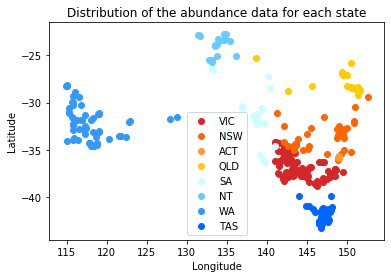

In [15]:
# Abundance has correct correspondence! I'll return back to analyzing occurence dataset.
states=['VIC','NSW','ACT','QLD','SA','NT','WA','TAS']
colors=['#d62728','#ff6600','#ff9933','#ffcc00','#ccffff','#66ccff','#3399ff','#0066ff']

for i in range(0,8):
    temp= abundance[abundance['AustraliaState']== states[i]]
    mean_occurence = temp.groupby(['AustraliaUTMGrid10Km_Lat', 'AustraliaUTMGrid10Km_Long'], as_index=False).mean()
    plt.scatter(mean_occurence['AustraliaUTMGrid10Km_Long'],mean_occurence['AustraliaUTMGrid10Km_Lat'], color=colors[i])

plt.title('Distribution of the abundance data for each state')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(['VIC','NSW','ACT','QLD','SA','NT','WA','TAS'])
plt.show()

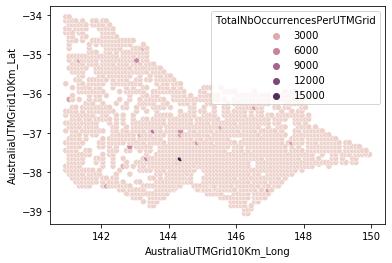

In [16]:
# Victoria distribution... which is labeled as 'VIC'
temp= occurence[occurence['AustraliaState']== 'VIC']
mean_occurence = temp.groupby(['AustraliaUTMGrid10Km_Lat', 'AustraliaUTMGrid10Km_Long'], as_index=False).mean()
_ = sns.scatterplot(x='AustraliaUTMGrid10Km_Long', y='AustraliaUTMGrid10Km_Lat', data=mean_occurence,hue=
                    'TotalNbOccurrencesPerUTMGrid')

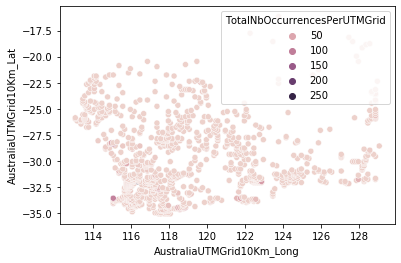

In [17]:
# Western Australia distribution... which is labeled as 'NT'
temp= occurence[occurence['AustraliaState']== 'NT']
mean_occurence = temp.groupby(['AustraliaUTMGrid10Km_Lat', 'AustraliaUTMGrid10Km_Long'], as_index=False).mean()
_ = sns.scatterplot(x='AustraliaUTMGrid10Km_Long', y='AustraliaUTMGrid10Km_Lat', data=mean_occurence,hue=
                    'TotalNbOccurrencesPerUTMGrid')

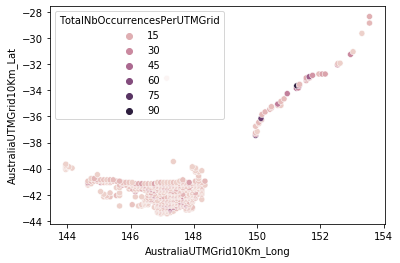

In [18]:
# Tasmania distribution... which is labeled as 'NSW'
temp= occurence[occurence['AustraliaState']== 'NSW']
mean_occurence = temp.groupby(['AustraliaUTMGrid10Km_Lat', 'AustraliaUTMGrid10Km_Long'],as_index=False).mean()
_ = sns.scatterplot(x='AustraliaUTMGrid10Km_Long', y='AustraliaUTMGrid10Km_Lat', data=mean_occurence,hue=
                    'TotalNbOccurrencesPerUTMGrid')

> **Observation III:**    
Victoria is spread evenly through -34 to -39 Lat and 140 to 150 Long  
Western Australia is spread evenly through -20 to -35 Lat and 114 to 128 Long  
Tasmania is concentrated on -40 to -44 Lat and 144 to 148 Long

In [19]:
abundance[['AustraliaUTMGrid10Km_ID','A_Prec_Avg30Yr','A_Psea_Avg30Yr','A_TMax_Avg30Yr','A_TSea_Avg30Yr']]

,AustraliaUTMGrid10Km_ID,A_Prec_Avg30Yr,A_Psea_Avg30Yr,A_TMax_Avg30Yr,A_TSea_Avg30Yr
0,55H0894,747.47,15.05,26.78,524.14
1,55H0412,654.82,14.26,31.44,572.24
2,56J3074,702.37,39.88,31.34,534.54
3,56J3074,702.37,39.88,31.34,534.54
4,56J1025,637.21,40.32,32.41,490.85
...,...,...,...,...,...
51236,54J4747,336.46,23.85,30.83,570.48
51237,54J4747,336.46,23.85,30.83,570.48
51238,54J4747,336.46,23.85,30.83,570.48
51239,54J4747,336.46,23.85,30.83,570.48


In [20]:
print(abundance[['AustraliaUTMGrid10Km_ID','A_Prec_Avg30Yr','A_Psea_Avg30Yr','A_TMax_Avg30Yr','A_TSea_Avg30Yr']].nunique())

AustraliaUTMGrid10Km_ID    302
A_Prec_Avg30Yr             299
A_Psea_Avg30Yr             289
A_TMax_Avg30Yr             268
A_TSea_Avg30Yr             299
dtype: int64


In [21]:
proof_of_30yr_kmid=abundance[abundance['AustraliaUTMGrid10Km_ID']=='54J4747']
proof_of_30yr_kmid[['AustraliaUTMGrid10Km_ID','A_Prec_Avg30Yr','A_Psea_Avg30Yr','A_TMax_Avg30Yr','A_TSea_Avg30Yr']].nunique()

AustraliaUTMGrid10Km_ID    1
A_Prec_Avg30Yr             1
A_Psea_Avg30Yr             1
A_TMax_Avg30Yr             1
A_TSea_Avg30Yr             1
dtype: int64

> **Observation IV:**  
The amount of unique 30 year values is closely correlated w/ the number of unique 10Km_IDs. Therefore, all weather data is location specific and not just the average of the whole continent. As seen above, the same 10Km_ID appears to give the same Avg30Yr values. This hypothesis is validated by picking a single 10Km_ID. Even though there are many rows, it only has one coresponding weather value per feature.

# More Data Exploration <a id="part-3"></a>

## Occurence <a id="part-4"></a>

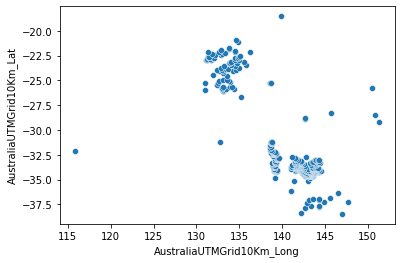

In [22]:
# Warren locations are Rabbit homes.
# Later we should check if any transect paths corespond
# to any warren homes.
# 1st concentration: -20 to -27.5 lat and 130 to 137 long
# 2nd concentration: -30 to -35 lat and 138 to 145 long

warren_locations=occurence[occurence['DataType']=='Warren_Location']

mean_warren_occurence = warren_locations.groupby(['AustraliaUTMGrid10Km_Lat', 'AustraliaUTMGrid10Km_Long'],
                             as_index=False).mean()
mean_warren_occurence = mean_warren_occurence[['AustraliaUTMGrid10Km_Lat', 
                                               'AustraliaUTMGrid10Km_Long',
                                   'TotalNbOccurrencesPerUTMGrid']]
_ = sns.scatterplot(x='AustraliaUTMGrid10Km_Long', y='AustraliaUTMGrid10Km_Lat',
                     data=mean_warren_occurence)

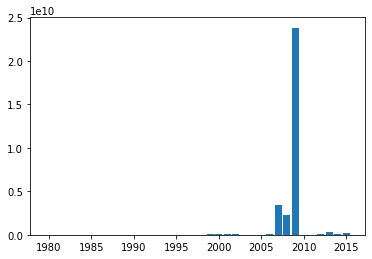

In [23]:
# In 2009, it had the highest TotalNbOccurrencesPerUTMGrid and decreased significantly at 2010 onward.

warren_year=warren_locations.groupby(['Year']).sum()
plt.bar(warren_year.index, warren_year.TotalNbOccurrencesPerUTMGrid)
plt.show()

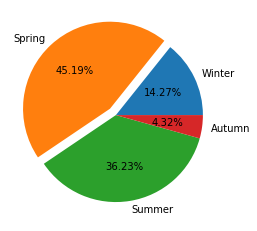

In [24]:
# Spring had sightings across many diverse 10km_ids and/or had a high frequency of recorded sightings in popular 10km_ids.

warren_season=warren_locations.groupby(['Season']).sum()
seasons=['Winter','Spring','Summer','Autumn']
explode = (0, 0.1, 0, 0)

plt.pie(
    warren_season['TotalNbOccurrencesPerUTMGrid'],
    labels=seasons,
    autopct='%1.2f%%',
    explode=explode
)
plt.show()

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


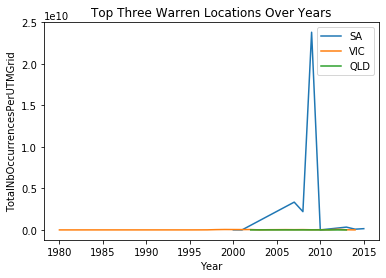

In [25]:
warren_QLD=warren_locations[warren_locations['AustraliaState']=='QLD'] # SA
warren_VIC=warren_locations[warren_locations['AustraliaState']=='VIC'] # VIC
warren_SA=warren_locations[warren_locations['AustraliaState']=='SA']   # QLD

# 'VIC' is labeled as 'VIC'.
# 'QLD' is labeled as 'SA'.
# 'SA' is labeled as 'QLD'.

warren_VIC_year=warren_VIC.groupby(['Year']).sum()
warren_SA_year=warren_SA.groupby(['Year']).sum()
warren_QLD_year=warren_QLD.groupby(['Year']).sum()

plt.plot(warren_QLD_year.index, warren_QLD_year.TotalNbOccurrencesPerUTMGrid)
plt.plot(warren_VIC_year.index, warren_VIC_year.TotalNbOccurrencesPerUTMGrid)
plt.plot(warren_SA_year.index, warren_SA_year.TotalNbOccurrencesPerUTMGrid)
plt.title('Top Three Warren Locations Over Years')
plt.ylabel('TotalNbOccurrencesPerUTMGrid')
plt.xlabel('Year')
plt.legend(['SA','VIC','QLD'])
plt.show()

> **Observation V:**  
Warrens aren't located near Western Australia or Tasmania but is within Victoria (the 3 most popular states for abundance). There is some correlation between transect and warren location. Nonetheless, the top 3 most populated warren states include South Australia, Victoria, and Queensland. These warren states are likely caused by the areas being less populated by people. 80% of sightings in historically popular 10Km_Ids took place in Spring and Summer. South Australia had a crazy high peak in sightings in historically popular 10Km_Ids at 2009, well above any other state.

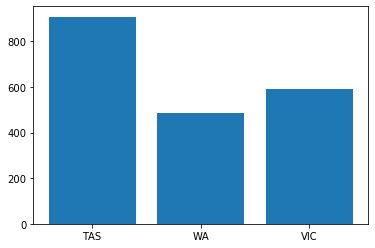

In [26]:
spring = occurence.groupby('AustraliaState').mean()

# 'VIC' is labeled as 'VIC'.
# 'WA' is labeled as 'NT'.
# 'TAS' is labeled as 'NSW'.

spring = spring.drop(labels=['ACT','QLD','SA','TAS','WA'], axis=0)

plt.bar(pd.Series(['TAS','WA','VIC']),spring['A_Prec_Avg30Yr']);

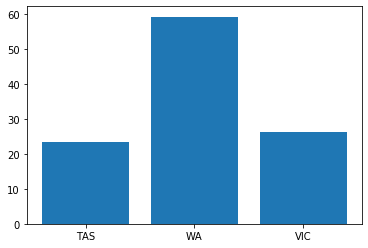

In [27]:
plt.bar(pd.Series(['TAS','WA','VIC']),spring['A_Psea_Avg30Yr']);

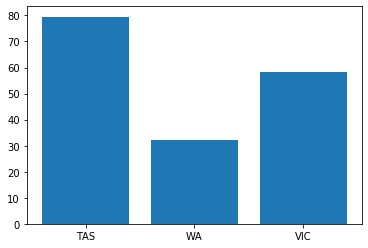

In [28]:
plt.bar(pd.Series(['TAS','WA','VIC']),spring['A_Prec_AvgSpring30Yr']);

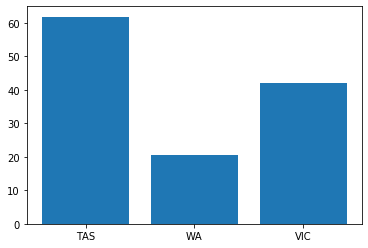

In [29]:
plt.bar(pd.Series(['TAS','WA','VIC']),spring['A_Prec_AvgSummer30Yr']);

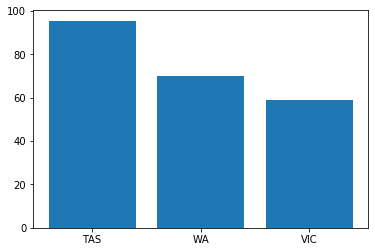

In [30]:
plt.bar(pd.Series(['TAS','WA','VIC']),spring['A_Prec_AvgWinter30Yr']);

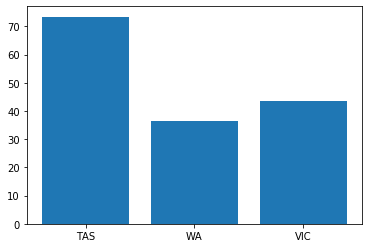

In [31]:
plt.bar(pd.Series(['TAS','WA','VIC']),spring['A_Prec_AvgAutumn30Yr']);

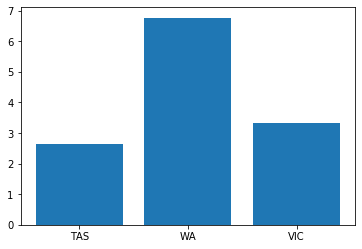

In [32]:
plt.bar(pd.Series(['TAS','WA','VIC']),spring['A_TMin_Avg30Yr']);

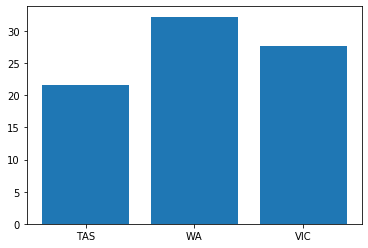

In [33]:
plt.bar(pd.Series(['TAS','WA','VIC']),spring['A_TMax_Avg30Yr']);

> **Observation VI:**  
Since there are many more unique 10Km_Id's in occurence vs. abundance, the weather data per state is more robust in occurence. Tasmania has more precipitation than the other two states per season as well as annually. However, Western Australia has the highest seasonal precipitation. I interpret seasonal preciptiation to mean higher precipitation variance throughout the seasons. Tasmania has the lowest average temperature from the past 30 years at 2.5°C (36.5°F). Western Australia has the highest average temperature from the past 30 years at 32°C (89.6°F).

## Abundance <a id="part-5"></a>

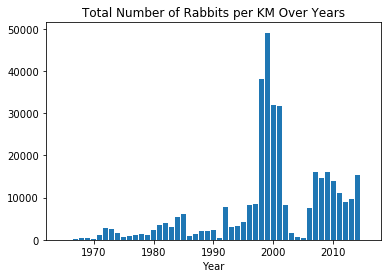

In [34]:
# 1999 was the most popular year.
abundance_year = abundance['RabbitsPerKm'].groupby(abundance['Year']).sum()
plt.bar(abundance_year.index, abundance_year)
plt.title('Total Number of Rabbits per KM Over Years')
plt.xlabel('Year')
plt.show()

In [35]:
WA = abundance[abundance['AustraliaState']== 'WA']
NT = abundance[abundance['AustraliaState']== 'NT']
QLD = abundance[abundance['AustraliaState']== 'QLD']
TAS = abundance[abundance['AustraliaState']== 'TAS']
NSW = abundance[abundance['AustraliaState']== 'NSW']
ACT = abundance[abundance['AustraliaState']== 'ACT']
SA = abundance[abundance['AustraliaState']== 'SA']
VIC = abundance[abundance['AustraliaState']== 'VIC']

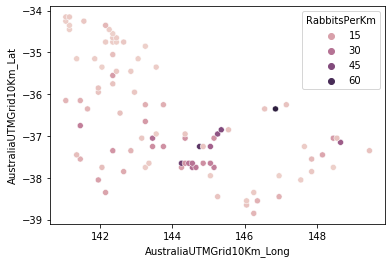

In [36]:
mean_abundance = VIC.groupby(['AustraliaUTMGrid10Km_Lat', 'AustraliaUTMGrid10Km_Long'],as_index=False).mean()
mean_abundance = mean_abundance[['AustraliaUTMGrid10Km_Lat', 'AustraliaUTMGrid10Km_Long','RabbitsPerKm']]
_ = sns.scatterplot(x='AustraliaUTMGrid10Km_Long', y='AustraliaUTMGrid10Km_Lat', data=mean_abundance, hue='RabbitsPerKm')

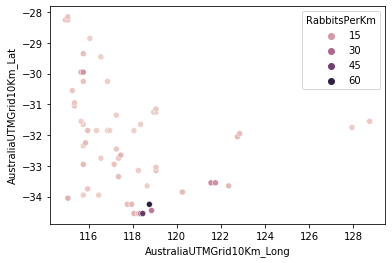

In [37]:
mean_abundance = WA.groupby(['AustraliaUTMGrid10Km_Lat', 'AustraliaUTMGrid10Km_Long'],as_index=False).mean()
mean_abundance = mean_abundance[['AustraliaUTMGrid10Km_Lat', 'AustraliaUTMGrid10Km_Long','RabbitsPerKm']]
_ = sns.scatterplot(x='AustraliaUTMGrid10Km_Long', y='AustraliaUTMGrid10Km_Lat', data=mean_abundance, hue='RabbitsPerKm')

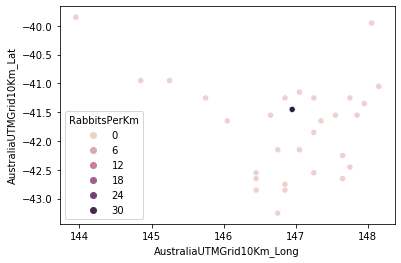

In [38]:
mean_abundance = TAS.groupby(['AustraliaUTMGrid10Km_Lat', 'AustraliaUTMGrid10Km_Long'],as_index=False).mean()
mean_abundance = mean_abundance[['AustraliaUTMGrid10Km_Lat', 'AustraliaUTMGrid10Km_Long','RabbitsPerKm']]
_ = sns.scatterplot(x='AustraliaUTMGrid10Km_Long', y='AustraliaUTMGrid10Km_Lat', data=mean_abundance, hue='RabbitsPerKm')

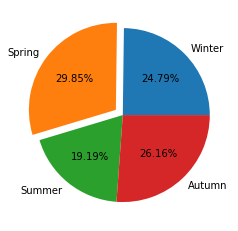

In [39]:
abundance_weather = abundance.groupby(['Season']).sum()

seasons=['Winter','Spring','Summer','Autumn']
explode = (0, 0.1, 0, 0)

plt.pie(
    abundance_weather['RabbitsPerKm'],
    labels=seasons,
    autopct='%1.2f%%',
    explode=explode
)
plt.show()

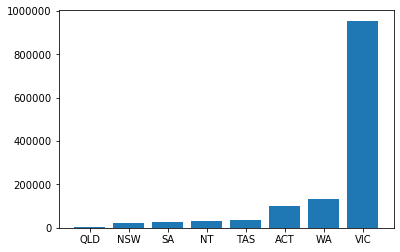

In [40]:
abundance_state = abundance.groupby(['AustraliaState']).sum()
abundance_state_rabbits = pd.DataFrame({
    'TotalNbTransectsPerUTMGrid': abundance_state['TotalNbTransectsPerUTMGrid']
})
abundance_state_rabbits.sort_values(by='TotalNbTransectsPerUTMGrid', inplace=True)

plt.bar(['QLD','NSW','SA','NT','TAS','ACT','WA','VIC'], abundance_state_rabbits['TotalNbTransectsPerUTMGrid'])
plt.show()

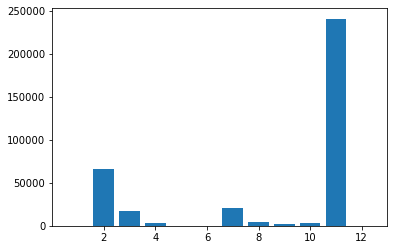

In [41]:
# The two most popular geographic locations are forests and aquatic.
abundance_vege=abundance.groupby(['VegeType']).sum()
plt.bar(abundance_vege.index,abundance_vege.RabbitsPerKm)
plt.show()

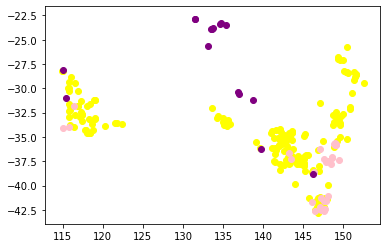

In [42]:
# 11 aqautic , 2: forest, 3: woodland

abundance_vege_11= abundance[abundance['VegeType']==11]
abundance_vege_2= abundance[abundance['VegeType']==2]
abundance_vege_3= abundance[abundance['VegeType']==7]

mean_abundance = abundance_vege_11.groupby(['AustraliaUTMGrid10Km_Lat', 'AustraliaUTMGrid10Km_Long'], as_index=False).mean()
plt.scatter(mean_abundance['AustraliaUTMGrid10Km_Long'],mean_abundance['AustraliaUTMGrid10Km_Lat'], color='yellow')

mean_abundance = abundance_vege_2.groupby(['AustraliaUTMGrid10Km_Lat', 'AustraliaUTMGrid10Km_Long'], as_index=False).mean()
plt.scatter(mean_abundance['AustraliaUTMGrid10Km_Long'],mean_abundance['AustraliaUTMGrid10Km_Lat'], color='pink')

mean_abundance = abundance_vege_3.groupby(['AustraliaUTMGrid10Km_Lat', 'AustraliaUTMGrid10Km_Long'], as_index=False).mean()
plt.scatter(mean_abundance['AustraliaUTMGrid10Km_Long'],mean_abundance['AustraliaUTMGrid10Km_Lat'], color='purple')

plt.show()

> **Observation VII:**  
A greater amount of RabbitsPerKm was recorded 1999 onward. The transects are evenly dispersed throughout Victoria, Western Australia, and Tasmania. Victoria has transects with the highest RabbitsPerKm counts and most popular spot for transect visits. The vast majority of transects are located in regions that are aquatic followed by forests and woodlands.

# Data Cleaning <a id="part-6"></a>

In [43]:
abundance['QA_TemporalCoverage'].unique()

array(['3.NA.4', '3.4.4', '3.2.1', '3.3.1', '3.2.3', '3.3.4', '4.4.4',
       '4.NA.4', '3.NA.3', '3.NA.1', '3.4.1', '3.4.3', '3.3.3', '3.4.2',
       '1.4.2', '2.2.1', '2.3.3', '3.3.2', '2.3.1', '2.3.2', '3.2.4',
       '4.4.3', '1.4.1', '1.3.2', '2.2.2', '4.4.1', '3.1.1', '2.4.1',
       '2.4.3', '2.4.2', '3.NA.2', '2.2.3', '1.2.2', '1.1.3', '1.3.1',
       '1.2.3', '1.3.3', '2.1.1', '4.NA.1', '4.4.2', '3.2.2', '2.4.4',
       '1.NA.NA', '3.NA.NA', '2.NA.NA', '4.NA.NA', '4.3.4', '3.1.2'],
      dtype=object)

In [44]:
abundance['QA_TemporalCoverage'].nunique()

48

> **Quality Assesment of abundance:**  
Before we select features for our model, 'QA_TemporalCoverage' will determine which rows to use from abundance.
According to the paper
"...Temporal coverage is important for time series analyses. Therefore, for the abundance dataset, we provide  
(i) the number of visits per year,  
(ii) the number of seasons for which the site was visited per year, and  
(iii) the number of years of sampling.  
The number of visits per year is calculated as the mode value over all years, or the median if a different number of visits was made every year at the site. We also calculated the number of seasons the fieldwork was carried out (by using mode value of the number of seasons per year) [Number of years calculated by obvious means]..." *(Roy-Dufresne 27)*.
Since we are predicting by year and season, we want to make sure we are training using
transects that are being visited throughout the four seasons throughout many years.
Using transects that were visited at only 1971 and 1972, for example, doesn't help 
much at all.

> **QA_TemporalCoverage Format:**  
A. Frequency of visit:  
> **1** means... >= 6 times  
> **2** means... 5-6 times  
> **3** means... 2-4 times  
> **4** means... 1 time  
B. Season frequency:  
**1** means... 4 seasons  
**2** means... 3 seasons  
**3** means... 2 seasons  
**4** means... 1 season  
C. Year(s) covered:  
**1** means... >5 years  
**2** means... 4-5 years  
**3** means... 2-3 years  
**4** means... <=1 years  
Therefore, 1.1.1 means frequency of >=6 visits, mode of 4 seasons, across >5 years.

In [45]:
# Assessing the count of rows for each possible QA_TemporalCoverage value.
qa_tc_explore(abundance)

The total rows is 44282
This is 86.4190784723171 % of the abundance dataset.
The other 13.580921527682904 % has a NaN in one or more sections.


In [46]:
# Parameters:
# A<=3 B<=1 C<=2
QATC=QA_Slice(abundance,3,1,2)

The total rows is 3747
This is 7.312503659179173 % of the abundance dataset.
The other 92.68749634082083 % of abundance was not included in this slice.


In [47]:
# 7.3% is far too low!
# Lets adjust our specifications:
# A<=3 B<=2 C<=3
QATC=QA_Slice(abundance,3,2,3)

The total rows is 7969
This is 15.551999375500088 % of the abundance dataset.
The other 84.44800062449991 % of abundance was not included in this slice.


In [48]:
# We can do better than 15%.
# Lets make one final adjustment:
# A<=3 B<=3 C<=3
QATC=QA_Slice(abundance,3,3,3)

The total rows is 24230
This is 47.28635272535665 % of the abundance dataset.
The other 52.71364727464335 % of abundance was not included in this slice.


In [49]:
# 50% is a good number!
# Lets slice the abundance dataframe to satisfy these specifications.
# A<=3 B<=3 C<=3
abundance = abundance[abundance['QA_TemporalCoverage'].isin(QATC)]

In [50]:
abundance.shape[0]

24230

In [51]:
uni_population_growth=abundance[['Year','Season','AustraliaUTMGrid10Km_ID','Transect_ID','AustraliaUTMGrid10Km_Long',
                                 'AustraliaUTMGrid10Km_Lat','TransectWidth','TransectLength','VegeType','DistPermWater',
                                 'DistAgriLand','PercSoilClay','M_TAvg_PreSummer','M_TAvg_PreWinter','M_Prec_2PresSeasons',
                                 'A_Prec_1YrLag','A_Prec_2YrLag','A_Psea_1YrLag','A_Psea_2YrLag','RabbitsPerKm']]
uni_population_growth

,Year,Season,AustraliaUTMGrid10Km_ID,Transect_ID,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat,TransectWidth,TransectLength,VegeType,DistPermWater,DistAgriLand,PercSoilClay,M_TAvg_PreSummer,M_TAvg_PreWinter,M_Prec_2PresSeasons,A_Prec_1YrLag,A_Prec_2YrLag,A_Psea_1YrLag,A_Psea_2YrLag,RabbitsPerKm
192,2013.0,4.0,55H0593,NaN,149.25,-32.95,100.0,10.0,8,0.96,1.69,13.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.300
193,2013.0,4.0,55H0593,NaN,149.25,-32.95,100.0,10.0,8,0.96,1.69,13.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700
194,2013.0,4.0,55H0593,NaN,149.25,-32.95,100.0,10.0,8,0.96,1.69,13.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500
195,2014.0,1.0,55H0593,NaN,149.25,-32.95,100.0,10.0,8,0.96,1.69,13.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.400
196,2014.0,1.0,55H0593,NaN,149.25,-32.95,100.0,10.0,8,0.96,1.69,13.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51236,2002.0,3.0,54J4747,3Creeks,138.65,-31.95,100.0,2.3,4,4.52,14.11,28.91,22.153,9.148,8.264,368.47,426.79,81.25,58.10,2.174
51237,2002.0,3.0,54J4747,3Creeks,138.65,-31.95,100.0,5.6,4,4.52,14.11,28.91,22.153,9.148,8.264,368.47,426.79,81.25,58.10,6.786
51238,2002.0,4.0,54J4747,3Creeks,138.65,-31.95,100.0,22.3,4,4.52,14.11,28.91,21.419,11.491,22.571,368.47,426.79,81.25,58.10,1.659
51239,2002.0,4.0,54J4747,3Creeks,138.65,-31.95,100.0,0.5,4,4.52,14.11,28.91,21.419,11.491,22.571,368.47,426.79,81.25,58.10,6.000


> **Feature Selection:**  
Finally, we choose all relevant features for our models. Since we want to predict the future rabbit sightings for the next year per season, knowing the average from the past 30 years DOES NOT help the model. We will limit our weather features to the annual/seasonal versions which also avoid time travel.  
'M_TAvg_PreSummer'             - Avg temperature for the previous summer season  
'M_TAvg_PreWinter'             - Avg temperature for the previous winter season  
'M_Prec_2PresSeasons'          - Avg rainfall of the two previous seasons  
~~'A_Prec'                       - Avg rainfall for the same year of the sampling date~~  
'A_Prec_1YrLag'                - Avg rainfall for the same year of the sampling date (1-year time lag)  
'A_Prec_2YrLag'                - Avg rainfall for the same year of the sampling date (2-year time lag)  
~~'A_Psea'                       - Seasonal average rainfall for the current year of the data sampling~~  
'A_Psea_1YrLag'                - Seasonal average rainfall for the current year of the data sampling (1-year time lag)  
'A_Psea_2YrLag'                - Seasonal average rainfall for the current year of the data sampling (2-year time lag)  

> The non-weather features are chosen accordingly.  
'Year', 'Season', 'AustraliaUTMGrid10Km_ID', 'Transect_ID', 'AustraliaUTMGrid10Km_Long', 'AustraliaUTMGrid10Km_Lat', 'TransectWidth', 'TransectLength', 'VegeType', 'DistPermWater', 'DistAgriLand', 'PercSoilClay'  

> The target feature will be a transformed version of 'RabbitsPerKm'.

In [52]:
# NECESSARY PREPROCESSING
# When trying to look for NaN values, better to start looking at the most important features
# If there is missing data in these important features, the only solution is to remove the rows.

# Remove all NaNs from 'Season'
uni_population_growth=uni_population_growth[uni_population_growth['Season'].notna()]
# Remove all nan Transect_IDs.
uni_population_growth=uni_population_growth[uni_population_growth['Transect_ID'].notna()]
# All important feature no longer have nans, great.

# The other features can have the nans plugged in w/ zeroes
# so long as not too many nans. Lets see how many nans.

# Almost a quarter of entries in 'TransectWidth' are nans. Too many. Remove this feature.
uni_population_growth=uni_population_growth.drop(columns=['TransectWidth'])

# Nearly all of the weather features have the same number of nans missing: 2417.
# Removing the nans from one weather feature should fix the rest.
uni_population_growth=uni_population_growth[uni_population_growth['M_TAvg_PreSummer'].notna()]

# All is well... except for one feature. Quickly fix
uni_population_growth=uni_population_growth[uni_population_growth['M_TAvg_PreWinter'].notna()]

> **Categorical Features:**  
Here's a breakdown of categorical features 'Season' and 'Vegetype'. Originally, these were one-hot-encoded but the models took too long to run so they won't be altered.  
___  
> **Season**  
"...Factor level:  
**1** means... (Summer: Jan, Feb, Mar),  
**2** means... (Autumn: Apr, May, Jun),  
**3** means... (Winter: Jul, Aug, Sep),  
**4** means... (Spring: Oct, Nov, Dec)..." *(Roy-Dufresne 41).*  
Ok, that's awful.
Lets classify the seasons based off of the American Calendar:  
Factor level:  
**1** (Winter: Jan, Feb, Mar),  
**2** (Spring: Apr, May, Jun),  
**3** (Summer: Jul, Aug, Sep),  
**4** (Autumn: Oct, Nov, Dec)  
___  
> **Vegetype**  
"...We re-classified the VegeType variable into 13 categories:  
1 ~~(rainforest and vine thicket)~~  
2 (eucalyptus forest)  
3 (eucalyptus woodland)  
4 (other woodlands)  
5 ~~(inundated swamps, salt marshes, other grasslands)~~  
6 ~~(low-closed forests and tall closed shrublands)~~  
7 (shrublands)  
8 (tussock grasslands)  
9 (hummock grasslands)  
10 (shrublands)  
11 (inland aquatic, water, lakes, lagoons)  
12 ~~(cleared vegetation, buildings, rocks, bare areas)~~  
13 ~~(unclassified and unknown features)~~" *(Roy-Dufresne 43).*  
(Everything that's not strikethrough had a row count>0 in uni_population_growth)

In [53]:
print(uni_population_growth['Season'].unique())
print(uni_population_growth['VegeType'].unique())

[2. 3. 4. 1.]
[ 8 11  2  3  7  9 10  4]


In [54]:
# Now we have to replace 'RabbitsPerKm' w/ the 'season_population' feature.

# 'RabbitsPerKm' - daily
# 'season_population' - season in a year

# The goal here is to calculate the total rabbit population per year-season-grid-transect.
# To get this, we use the following formula: SUM([RabbitsPerKm_1 * TransectLength_1], ... , [RabbitsPerKm_N * TransectLength_N])
# For the summation, the records where grouped by 'Year','Season','AustraliaUTMGrid10Km_ID', and 'Transect_ID'

uni_population_growth['number_sightings'] = uni_population_growth['RabbitsPerKm']*uni_population_growth['TransectLength']
uni_population_growth['season_population'] = uni_population_growth.groupby(['Year','Season','AustraliaUTMGrid10Km_ID','Transect_ID'])['number_sightings'].transform(np.sum)
del uni_population_growth['RabbitsPerKm']
del uni_population_growth['number_sightings']

uni_population_growth=uni_population_growth.groupby(['Year','Season','AustraliaUTMGrid10Km_ID','Transect_ID',\
                                                     'AustraliaUTMGrid10Km_Long','AustraliaUTMGrid10Km_Lat',\
                                                     'TransectLength','VegeType','DistPermWater','DistAgriLand',\
                                                     'PercSoilClay']).mean().reset_index()
uni_population_growth.sort_values(['Year','Season','Transect_ID'])

,Year,Season,AustraliaUTMGrid10Km_ID,Transect_ID,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat,TransectLength,VegeType,DistPermWater,DistAgriLand,PercSoilClay,M_TAvg_PreSummer,M_TAvg_PreWinter,M_Prec_2PresSeasons,A_Prec_1YrLag,A_Prec_2YrLag,A_Psea_1YrLag,A_Psea_2YrLag,season_population
0,1971.0,2.0,54H0071,C1,139.05,-32.15,8.0,10,2.82,55.88,30.00,23.3278,9.086000,37.854600,306.50,306.50,82.87,82.87,36.0000
2,1971.0,2.0,54H0128,C1,138.75,-32.25,8.0,4,5.35,35.73,27.60,23.2970,9.061333,32.258333,338.82,338.82,70.66,70.66,55.0000
1,1971.0,2.0,54H0071,C2,139.05,-32.15,8.0,10,2.82,55.88,30.00,23.3278,9.086000,37.854600,306.50,306.50,82.87,82.87,40.0000
3,1971.0,2.0,54H0128,C2,138.75,-32.25,8.0,4,5.35,35.73,27.60,23.2970,9.061333,32.258333,338.82,338.82,70.66,70.66,79.0000
4,1971.0,4.0,54H0071,C1,139.05,-32.15,8.0,10,2.82,55.88,30.00,23.2970,9.061333,10.717000,306.50,306.50,82.87,82.87,14.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9138,2012.0,4.0,55H3423,9,144.25,-37.75,0.5,11,0.40,1.51,15.67,19.4000,7.606000,36.404000,820.26,783.92,61.91,53.20,14.0000
9163,2012.0,4.0,55H3870,9,146.95,-38.45,0.6,11,5.06,1.47,8.44,21.6350,9.373000,19.504000,831.23,618.16,42.65,42.51,16.9998
8871,2012.0,4.0,54H1351,HwyNth,141.05,-34.25,27.0,4,4.72,6.25,22.26,23.5900,10.141000,12.161000,475.42,502.54,93.06,79.10,0.9990
8916,2012.0,4.0,54H2021,Timberoo,142.05,-35.35,16.0,11,2.51,1.08,8.66,23.5900,10.141000,12.161000,441.44,482.26,84.89,73.28,28.0130


> **Feature Transformation:**  
Transform 'RabbitsPerKm', a daily value, to 'season_population', a season value of all transects. There is different weather data for the same location in the same time. To resolve, take the mean of all weather features and 'season_population' to avoid similar rows. Now, we explore the dataset for any other inconsistancies.

In [55]:
# We are getting different UTMGrids for the same transect... how can this be?
uni_population_growth.head(10)

,Year,Season,AustraliaUTMGrid10Km_ID,Transect_ID,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat,TransectLength,VegeType,DistPermWater,DistAgriLand,PercSoilClay,M_TAvg_PreSummer,M_TAvg_PreWinter,M_Prec_2PresSeasons,A_Prec_1YrLag,A_Prec_2YrLag,A_Psea_1YrLag,A_Psea_2YrLag,season_population
0,1971.0,2.0,54H0071,C1,139.05,-32.15,8.0,10,2.82,55.88,30.0,23.3278,9.086000,37.854600,306.50,306.50,82.87,82.87,36.0
1,1971.0,2.0,54H0071,C2,139.05,-32.15,8.0,10,2.82,55.88,30.0,23.3278,9.086000,37.854600,306.50,306.50,82.87,82.87,40.0
2,1971.0,2.0,54H0128,C1,138.75,-32.25,8.0,4,5.35,35.73,27.6,23.2970,9.061333,32.258333,338.82,338.82,70.66,70.66,55.0
3,1971.0,2.0,54H0128,C2,138.75,-32.25,8.0,4,5.35,35.73,27.6,23.2970,9.061333,32.258333,338.82,338.82,70.66,70.66,79.0
4,1971.0,4.0,54H0071,C1,139.05,-32.15,8.0,10,2.82,55.88,30.0,23.2970,9.061333,10.717000,306.50,306.50,82.87,82.87,14.0
5,1971.0,4.0,54H0071,C2,139.05,-32.15,8.0,10,2.82,55.88,30.0,23.2970,9.061333,10.717000,306.50,306.50,82.87,82.87,17.0
6,1971.0,4.0,54H0128,C1,138.75,-32.25,8.0,4,5.35,35.73,27.6,23.2585,9.030500,15.866000,338.82,338.82,70.66,70.66,19.0
7,1971.0,4.0,54H0128,C2,138.75,-32.25,8.0,4,5.35,35.73,27.6,23.2585,9.030500,15.866000,338.82,338.82,70.66,70.66,50.0
8,1972.0,1.0,54H0071,C1,139.05,-32.15,8.0,10,2.82,55.88,30.0,23.3740,10.225000,3.751000,306.50,306.50,82.87,82.87,51.0
9,1972.0,1.0,54H0071,C2,139.05,-32.15,8.0,10,2.82,55.88,30.0,23.3740,10.225000,3.751000,306.50,306.50,82.87,82.87,61.0


In [56]:
# Taking a look at uncertainty management notes... a feature from abundance
# Perhaps reading it will provide some insight.
# ... No, not very useful
print(abundance['UncertaintyManagementNotes'].unique())
abundance['UncertaintyManagementNotes'].nunique()

[nan 'Wind_50km/hr' 'Drizzle' 'NoCount_due_to_illness' 'Rain'
 'Wind_30km/hr' 'High_veg_cover' 'High_veg_cover_&_wind_strong'
 'NoCount_interrupted' 'NoCount' 'High_predators_number_(cats&foxes)'
 'High_veg_cover_&_high cats_number' 'Pre-poisoning'
 'BaitStation_post-poisoned' 'Unripped' 'No_ripped' 'No_treatment'
 '2004_Ripped' '2003-2004_Ripped' 'Post-shooting' 'Post-RCD' 'Poisoned'
 'Post-RHD_&_poisoning' 'BaitStation_poisoned' 'Pre-RHD'
 'Post-treatment_control' 'Ripped_fumigated_poisonned'
 'No_fleas_releashed' 'Fleas_releashed'
 'Nov1996_RCD_&_Sep1997_RCD_&_Feb1998_RCD' 'Oct1996_RCD_Dec1997_RCD'
 '1968_Warrens_ripped_&_1976_Fleas_releashed_&_1983_Warrens_ripped'
 'Data_collected_during_foxes_monitoring'
 'April2001_Ripped_&_May2001_fumigation_explosives'
 'March1992_Ripped_&_fumigation_explosives' '1970_Fleas_releashed'
 '1998-2002_Ripping_program_&_no_Myxo_rabbits'
 '1998-2002_Ripping_program_&_<5%_Myxo_rabbits'
 '1998-2002_Ripping_program_&_<10%_Myxo_rabbits'
 '1998-2002_Rippin

49

In [57]:
# Not only can transects be in more than one 10km location, but
# (as shown below) one 10km can have multiple transects.
# 145 transects among 66 10 km locations.

# For our dataset, each transect can only have one 10 km location.
# The first point is a problem. However, having multiple transects
# in the same 10 km ID isn't really an issue... now we know that
# the transects are close together.

print(uni_population_growth['Transect_ID'].unique())
print(uni_population_growth['Transect_ID'].nunique())
print(uni_population_growth['AustraliaUTMGrid10Km_ID'].unique())
print(uni_population_growth['AustraliaUTMGrid10Km_ID'].nunique())
example_432=uni_population_growth[['AustraliaUTMGrid10Km_Long','AustraliaUTMGrid10Km_Lat']]
example_432

['C1' 'C2' '6' '1' '2' '3' '4' '5' '7' '8' '9' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31' '32' '33' '34' 'HwyNth' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'Pawelski' 'Z' '139' '35' '40' '36' '37' '38' 'Balingup'
 'Irishtown' 'Boothendara_Rd' 'BR1' 'BR2' 'MR1' 'SB1' 'SB2' 'SB3' 'WR1'
 'WR2' 'WR3' '139A' '139B' '139_Road' 'Village' 'Bush1' 'Bush2' '179A'
 'Venus_Bay_2' 'Pt_Kenny_3' 'Beach_rd' 'Smiths' 'Kelsh/pk_bound'
 'Avondale ' '3Creeks' '2R' '2U' '3R' '3U' '4R' '4U' 'RCV' 'Elliston'
 'Lock' '1U' 'Ceduna' 'Streaky_Bay' 'Wudinna' 'Y' '39' 'na10' 'na11'
 'na12' 'na4' 'na9' 'LG1' 'LG10' 'LG11' 'LG12' 'LG13' 'LG14' 'LG2' 'LG3'
 'LG4' 'LG5' 'LG6' 'LG7' 'LG8' 'LG9' 'YO1' 'NA1' 'NA10' 'NA11' 'NA12'
 'NA2' 'NA3' 'NA4' 'NA6' 'NA7' 'NA8' 'NA9' 'YL1' 'YL2' 'YL3' 'YL4' 'YO5'
 'YL13' 'YL14' 'YL5' 'YL6' 'YL8' 'NA5' 'c1' 'c2' 'c3' 'c4' 'c5' 'c6'
 'Timberoo']
145
['54H0071' '54H0128' '53J1211' '53J0848' '52K4135' '53J0618' '53K4405'

,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat
0,139.05,-32.15
1,139.05,-32.15
2,138.75,-32.25
3,138.75,-32.25
4,139.05,-32.15
...,...,...
9159,146.95,-38.45
9160,146.95,-38.45
9161,146.95,-38.45
9162,146.95,-38.45


In [58]:
# 66 unique latitude longitude combinations
example_432.drop_duplicates()

,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat
0,139.05,-32.15
2,138.75,-32.25
136,133.05,-26.05
151,132.75,-25.45
178,131.45,-22.85
...,...,...
6661,116.85,-31.85
6731,119.05,-31.25
7029,115.65,-29.95
7031,115.75,-29.95


> **Data irregularities:**  
The Transect_ID is so unreliable.  
Not only can the same Transect_ID have multiple lengths,
but it can also cover many 10Km_ID's. If a transect can 
be in more than one place at once whilst having a varying 
size, the ID serves no use in the dataset.  
Earlier, we sliced the dataset to consist of transects 
that were visited frequently over a long period of time.
As a result, we can remove the Transect_ID's knowing 
that researchers visited similar locations over time. 
This still gives consistency in the dataset. We can also 
drop AustraliaUTMGrid10Km_ID as it is also unnecessary.  
Now, we will transition to using latitude and longitude 
coordinates. Not only are they continuous features, but 
they allow us to make some assumptions:  
Although there may be more than one transect in some 
latitude+longitude coordinates, they will likely
share a similar transect length and weather/geo
features so its fine.  
If the same transect has different lengths, observations
of the same transect shouldn't be combined. According to profe-
ssional guidelines on transect spotlight surveys:
"Use the same Route, Time, Rate of Travel, Spotlight
Power, Observer, and Vehicle [per survey]" (Mitchell 10).
A different length for the same transect means a different
researcher(s) doing a survey for the path. Their survey
results shouldn't be combined w/ survey results from
different researchers even if on the same transect.  

      Reference:  
            Mitchell, Bruce, and Suzanne Balogh. Monitoring Techniques for Vertebrate Pests Rabbits. Australia: NSW  
      Department of Primary Industries, n.d. PDF.

In [59]:
del uni_population_growth['AustraliaUTMGrid10Km_ID']
del uni_population_growth['Transect_ID']
uni_population_growth=uni_population_growth.groupby(['Year','Season','AustraliaUTMGrid10Km_Long','AustraliaUTMGrid10Km_Lat'\
                                                     ,'TransectLength','VegeType','DistPermWater','DistAgriLand',\
                                                     'PercSoilClay']).mean().reset_index()
uni_population_growth

,Year,Season,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat,TransectLength,VegeType,DistPermWater,DistAgriLand,PercSoilClay,M_TAvg_PreSummer,M_TAvg_PreWinter,M_Prec_2PresSeasons,A_Prec_1YrLag,A_Prec_2YrLag,A_Psea_1YrLag,A_Psea_2YrLag,season_population
0,1971.0,2.0,138.75,-32.25,8.00,4,5.35,35.73,27.60,23.2970,9.061333,32.258333,338.82,338.82,70.66,70.66,67.00000
1,1971.0,2.0,139.05,-32.15,8.00,10,2.82,55.88,30.00,23.3278,9.086000,37.854600,306.50,306.50,82.87,82.87,38.00000
2,1971.0,4.0,138.75,-32.25,8.00,4,5.35,35.73,27.60,23.2585,9.030500,15.866000,338.82,338.82,70.66,70.66,34.50000
3,1971.0,4.0,139.05,-32.15,8.00,10,2.82,55.88,30.00,23.2970,9.061333,10.717000,306.50,306.50,82.87,82.87,15.50000
4,1972.0,1.0,138.75,-32.25,8.00,4,5.35,35.73,27.60,23.3740,10.225000,3.751000,338.82,338.82,70.66,70.66,67.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754,2012.0,4.0,148.95,-35.75,0.70,2,5.21,19.91,24.83,15.0760,2.812000,56.754000,998.27,1182.81,62.75,55.83,47.50035
2755,2012.0,4.0,148.95,-35.75,0.75,2,5.21,19.91,24.83,15.0760,2.812000,56.754000,998.27,1182.81,62.75,55.83,30.99975
2756,2012.0,4.0,148.95,-35.75,0.90,2,5.21,19.91,24.83,15.0760,2.812000,56.754000,998.27,1182.81,62.75,55.83,0.99990
2757,2012.0,4.0,148.95,-35.75,1.80,2,5.21,19.91,24.83,15.0760,2.812000,56.754000,998.27,1182.81,62.75,55.83,108.00000


In [60]:
uni_population_growth.columns

Index(['Year', 'Season', 'AustraliaUTMGrid10Km_Long',
       'AustraliaUTMGrid10Km_Lat', 'TransectLength', 'VegeType',
       'DistPermWater', 'DistAgriLand', 'PercSoilClay', 'M_TAvg_PreSummer',
       'M_TAvg_PreWinter', 'M_Prec_2PresSeasons', 'A_Prec_1YrLag',
       'A_Prec_2YrLag', 'A_Psea_1YrLag', 'A_Psea_2YrLag', 'season_population'],
      dtype='object')

In [61]:
# Here is the minimum and maximum value of the season population for the whole column
print(uni_population_growth.season_population.min(), ',',  uni_population_growth.season_population.max())

0.0 , 1618.004


In [62]:
# Statistics of the dataframe
uni_population_growth.describe()

,Year,Season,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat,TransectLength,VegeType,DistPermWater,DistAgriLand,PercSoilClay,M_TAvg_PreSummer,M_TAvg_PreWinter,M_Prec_2PresSeasons,A_Prec_1YrLag,A_Prec_2YrLag,A_Psea_1YrLag,A_Psea_2YrLag,season_population
count,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000,2759.000000
mean,1999.761870,2.547300,134.078307,-33.717597,4.833132,8.081551,6.487727,50.620062,20.247709,21.968163,9.867248,38.661228,496.967738,481.299315,79.641972,75.900707,34.331347
std,8.687186,1.099736,12.502869,3.209420,10.198607,3.777757,8.074251,153.514109,9.597347,3.180601,2.828466,29.184484,242.883875,236.947616,28.670063,21.805288,70.384861
min,1971.000000,1.000000,114.950000,-38.450000,0.200000,2.000000,0.150000,0.190000,5.000000,13.897000,2.546000,0.000000,73.680000,73.680000,34.000000,34.000000,0.000000
25%,1997.000000,2.000000,119.050000,-35.750000,0.750000,3.000000,2.060000,1.080000,13.880000,20.010000,8.959000,16.161000,314.000000,305.330000,60.710000,59.890000,2.500000
50%,2000.000000,2.000000,139.050000,-34.050000,2.000000,11.000000,4.720000,2.600000,21.240000,22.690000,10.499000,32.828000,441.440000,419.130000,73.730000,72.050000,10.999800
75%,2007.000000,4.000000,144.350000,-32.150000,5.000000,11.000000,5.700000,19.910000,24.830000,23.590000,11.990000,55.010000,681.430000,663.590000,88.690000,88.400000,37.002000
max,2012.000000,4.000000,148.950000,-22.850000,100.000000,11.000000,52.940000,716.450000,47.190000,31.029000,16.571000,177.821000,1232.150000,1232.150000,215.820000,198.730000,1618.004000


#### Creating two lag features

In [63]:
uni_population_growth = uni_population_growth.sort_values(['Year','Season','AustraliaUTMGrid10Km_Lat','AustraliaUTMGrid10Km_Long'])

uni_population_growth[(uni_population_growth['Season']==1) &(uni_population_growth['AustraliaUTMGrid10Km_Long']==138.75) &(uni_population_growth['AustraliaUTMGrid10Km_Lat']==-32.25) ][['Year','Season',
'AustraliaUTMGrid10Km_Long','AustraliaUTMGrid10Km_Lat','season_population']].head(10)

,Year,Season,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat,season_population
4,1972.0,1.0,138.75,-32.25,67.0
12,1973.0,1.0,138.75,-32.25,48.5
20,1974.0,1.0,138.75,-32.25,46.0
28,1975.0,1.0,138.75,-32.25,132.0
36,1976.0,1.0,138.75,-32.25,30.5
44,1977.0,1.0,138.75,-32.25,75.5
52,1978.0,1.0,138.75,-32.25,81.5
60,1979.0,1.0,138.75,-32.25,21.0
69,1980.0,1.0,138.75,-32.25,30.5
84,1981.0,1.0,138.75,-32.25,8.5


In [64]:
def featureProcessing(group):
    group['season_population-1'] = group['season_population'].shift(1)
    group['season_population-2'] = group['season_population'].shift(2)
    return group
uni_population_growth = uni_population_growth.groupby(['Season','AustraliaUTMGrid10Km_Long', 'AustraliaUTMGrid10Km_Lat']).apply(lambda group: featureProcessing(group))
uni_population_growth.fillna(-1, inplace=True)

In [65]:
uni_population_growth[(uni_population_growth['Season']==1) &(uni_population_growth['AustraliaUTMGrid10Km_Long']==138.75) &(uni_population_growth['AustraliaUTMGrid10Km_Lat']==-32.25) ][['Year','Season',
'AustraliaUTMGrid10Km_Long','AustraliaUTMGrid10Km_Lat','season_population','season_population-1','season_population-2']].head(10)

,Year,Season,AustraliaUTMGrid10Km_Long,AustraliaUTMGrid10Km_Lat,season_population,season_population-1,season_population-2
4,1972.0,1.0,138.75,-32.25,67.0,-1.0,-1.0
12,1973.0,1.0,138.75,-32.25,48.5,67.0,-1.0
20,1974.0,1.0,138.75,-32.25,46.0,48.5,67.0
28,1975.0,1.0,138.75,-32.25,132.0,46.0,48.5
36,1976.0,1.0,138.75,-32.25,30.5,132.0,46.0
44,1977.0,1.0,138.75,-32.25,75.5,30.5,132.0
52,1978.0,1.0,138.75,-32.25,81.5,75.5,30.5
60,1979.0,1.0,138.75,-32.25,21.0,81.5,75.5
69,1980.0,1.0,138.75,-32.25,30.5,21.0,81.5
84,1981.0,1.0,138.75,-32.25,8.5,30.5,21.0


# Data Modeling <a id="part-7"></a>

In [66]:
uni_population_growth.shape

(2759, 19)

In [67]:
uni_population_growth.dtypes

Year                         float64
Season                       float64
AustraliaUTMGrid10Km_Long    float64
AustraliaUTMGrid10Km_Lat     float64
TransectLength               float64
VegeType                       int64
DistPermWater                float64
DistAgriLand                 float64
PercSoilClay                 float64
M_TAvg_PreSummer             float64
M_TAvg_PreWinter             float64
M_Prec_2PresSeasons          float64
A_Prec_1YrLag                float64
A_Prec_2YrLag                float64
A_Psea_1YrLag                float64
A_Psea_2YrLag                float64
season_population            float64
season_population-1          float64
season_population-2          float64
dtype: object

In [68]:
uni_population_growth['season_population']=uni_population_growth['season_population'].astype(int)
target_column = 'season_population'

feature_columns = ['Year', 'Season', 'AustraliaUTMGrid10Km_Long',
       'AustraliaUTMGrid10Km_Lat', 'TransectLength', 'VegeType',
       'DistPermWater', 'DistAgriLand', 'PercSoilClay', 'M_TAvg_PreSummer',
       'M_TAvg_PreWinter', 'M_Prec_2PresSeasons', 'A_Prec_1YrLag',
       'A_Prec_2YrLag', 'A_Psea_1YrLag', 'A_Psea_2YrLag','season_population-1','season_population-2']

X = uni_population_growth[feature_columns]
y = uni_population_growth[target_column]

# 75% train data, 25% test data
X_train, X_test, y_train, y_test = X.iloc[:2069 , :], X.iloc[2069: , :], y[:2069], y[2069:]


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

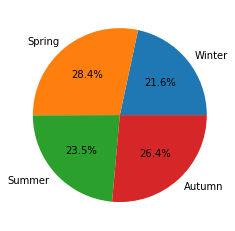

In [69]:
# The seasons are evenly distibuted. Good to know before training our model.

all_seasons = ('Winter', 'Spring', 'Summer','Autumn')
season_counts = (uni_population_growth[uni_population_growth['Season']==1].shape[0],
                 uni_population_growth[uni_population_growth['Season']==2].shape[0],
                 uni_population_growth[uni_population_growth['Season']==3].shape[0],
                 uni_population_growth[uni_population_growth['Season']==4].shape[0])
plt.pie(
season_counts,
labels=all_seasons,
autopct='%1.1f%%',
)
plt.show()

In [70]:
# The outliers are at 500+
temp=uni_population_growth[uni_population_growth['season_population']>500]
temp[['Year','Season','TransectLength','season_population']]

,Year,Season,TransectLength,season_population
316,1989.0,4.0,8.0,619
322,1990.0,3.0,8.0,872
335,1991.0,4.0,43.0,1618
336,1992.0,1.0,8.8,897
585,1994.0,4.0,29.0,981


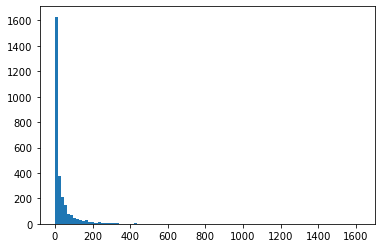

In [71]:
# What does the distribution of season_population look like?
plt.hist(uni_population_growth['season_population'], bins=100);

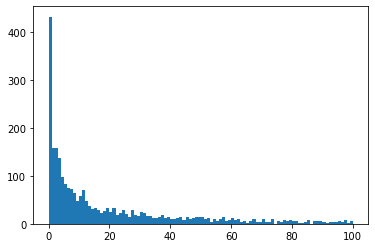

In [72]:
# Lets zoom in on everything less than 100
plt.hist(uni_population_growth[uni_population_growth['season_population'] <= 100]['season_population'], bins=100);

# Linear Regression (Without removing outliers) <a id="part-8"></a>

In [73]:
LR = LinearRegression().fit(X_train, y_train)

LR_pred = LR.predict(X_test)
score= LR.score(X_test,y_test)
print('The MSE is:',metrics.mean_squared_error(y_test, LR_pred, squared=False))
print('The score is:',score)

The MSE is: 61.242759614127806
The score is: 0.1621104152355708


The value of the mean squared error is 76.52 which shows that we have some outliers.

# Linear Regression (Removing outliers)

In [74]:
df2 = uni_population_growth[uni_population_growth['season_population']<250]
temp=uni_population_growth[uni_population_growth['season_population']<250].shape[0]/2759
temp*=100
print('All season_population values w/ values less than 250 account for',temp,"% of the data. Ignore those outliers.")

All season_population values w/ values less than 250 account for 98.44146429865893 % of the data. Ignore those outliers.


In [75]:
X = df2[feature_columns]
y = df2[target_column]

# 75% train data, 25% test data
X_train, X_test, y_train, y_test = X.iloc[:2069 , :], X.iloc[2069: , :], y[:2069], y[2069:]

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform (X_test)

In [76]:
Linear = LinearRegression().fit(X_train, y_train)

Linear_pred = Linear.predict(X_test)
score= LR.score(X_test,y_test)
print('The MSE is:',metrics.mean_squared_error(y_test, Linear_pred, squared=False))
print('The score is:',score)

The MSE is: 40.89462251678813
The score is: 0.08383144051560598


Mean squared error is 40.9 which shows that our algorithm is not that accurate, but it can still make better predictions than before. 

In [77]:
coeff_df = pd.DataFrame(Linear.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Year,-7.618205
Season,0.632931
AustraliaUTMGrid10Km_Long,-1.999893
AustraliaUTMGrid10Km_Lat,2.353440
TransectLength,1.917100
VegeType,-1.094057
DistPermWater,-4.695808
DistAgriLand,-6.393049
PercSoilClay,-4.518061
M_TAvg_PreSummer,-0.586457


It shows that our most important features are A_Psea_2YrLag,tansectLength. And the feaures mWaterPercSoilClay,istAgriLand,DistAgriLand are negatively correlated.

### Evaluation

In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Linear_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Linear_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Linear_pred)))

Mean Absolute Error: 27.815269247887905
Mean Squared Error: 1672.3701507905948
Root Mean Squared Error: 40.89462251678813


The result shows that our algorithm is not that accurate.

# Logistic Regression

In [79]:
pd.qcut(uni_population_growth.season_population, 3)

0       (24.667, 1618.0]
1       (24.667, 1618.0]
2       (24.667, 1618.0]
3          (4.0, 24.667]
4       (24.667, 1618.0]
              ...       
2722       (4.0, 24.667]
2723       (-0.001, 4.0]
2724       (4.0, 24.667]
2725       (4.0, 24.667]
2709       (-0.001, 4.0]
Name: season_population, Length: 2759, dtype: category
Categories (3, interval[float64]): [(-0.001, 4.0] < (4.0, 24.667] < (24.667, 1618.0]]

In [80]:
# Use qcut to give 3 equal class sizes. Uneven bins will lead to misleading accuracy scores.
uni_population_growth['season_population'] = pd.qcut(uni_population_growth.season_population, 3,\
labels=[0,1,2])
X = uni_population_growth[feature_columns]
y = uni_population_growth[target_column]

# 75% train data, 25% test data
X_train, X_test, y_train, y_test = X.iloc[:2069 , :], X.iloc[2069: , :], y[:2069], y[2069:]

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [81]:
uni_population_growth['season_population'].value_counts()

0    983
2    920
1    856
Name: season_population, dtype: int64

In [82]:
LogR = LogisticRegression()

# Source - https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
search = GridSearchCV(LogR, space, scoring='accuracy', n_jobs=-1,cv=2)
result = search.fit(X_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.470247339257515
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [83]:
LogR = LogisticRegression(C=.001,penalty='l2', solver='newton-cg').fit(X_train,y_train)
lr_probs =LogR.predict_proba(X_test)
lr_pred = LogR.predict(X_test)
lr_auc = roc_auc_score(y_test, lr_probs, multi_class='ovo')
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.736


### Evolution

In [84]:
score = LogR.score(X_test, y_test)
print(score)

0.563768115942029


In [85]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

Mean Absolute Error: 0.5318840579710145
Mean Squared Error: 0.7231884057971014
Root Mean Squared Error: 0.8504048481735634


Mean absolute error is 0.85 which shows that our algorithm is accurate and it can make good predictions.

In [86]:
cm = metrics.confusion_matrix(y_test, lr_pred )
print(cm)

[[175  76  51]
 [103  66  40]
 [ 15  16 148]]


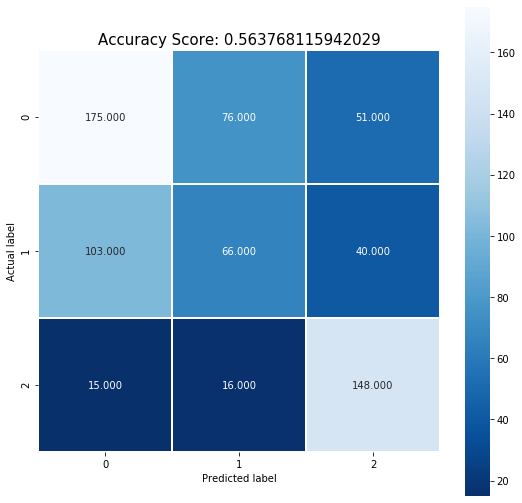

In [87]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Overall, our model can correctly classify class 2 most of the time but struggles to classify other two classes.

In [88]:
accuracy_score(y_test,lr_pred)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.60      0.58      0.59       302
           1       0.42      0.32      0.36       209
           2       0.62      0.83      0.71       179

    accuracy                           0.56       690
   macro avg       0.54      0.57      0.55       690
weighted avg       0.55      0.56      0.55       690



# Random Forest classifier <a id="part-10"></a>

In [89]:
rfr = RandomForestClassifier(random_state = 1)
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2','sqrt'], 'n_estimators': [3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 0, return_train_score=True)
result = g_search.fit(X_train, y_train);
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.4934835194884415
Best Hyperparameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 13}


In [90]:
rfr = RandomForestClassifier(bootstrap=True, max_depth=5, max_features='auto',n_estimators=13).fit(X_train,y_train)
rfr_probs = rfr.predict_proba(X_test)
rfr_pred = rfr.predict(X_test)
rfr_auc = roc_auc_score(y_test, rfr_probs, multi_class='ovo')
print('Random Forest: ROC AUC=%.3f' % (rfr_auc))

Random Forest: ROC AUC=0.734


### Evaluation

In [91]:
accuracy_score(y_test,rfr_pred)

0.5942028985507246

In [92]:
cm = metrics.confusion_matrix(y_test, rfr_pred )
print(cm)

[[180  83  39]
 [ 64  91  54]
 [ 13  27 139]]


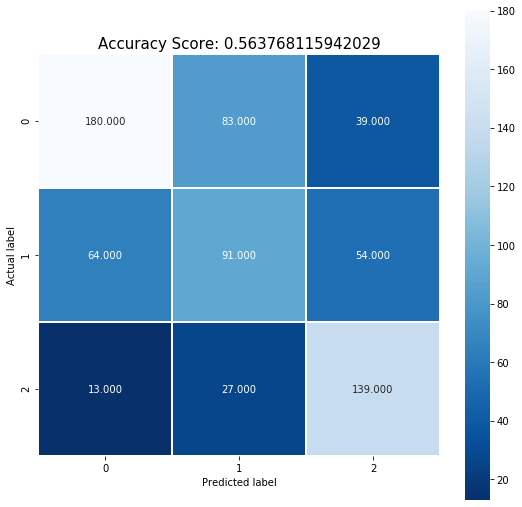

In [93]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Classification report

In [94]:
print(classification_report(y_test, rfr_pred))

              precision    recall  f1-score   support

           0       0.70      0.60      0.64       302
           1       0.45      0.44      0.44       209
           2       0.60      0.78      0.68       179

    accuracy                           0.59       690
   macro avg       0.58      0.60      0.59       690
weighted avg       0.60      0.59      0.59       690



# Neural Network <a id="part-11"></a>

In [95]:
model = Sequential()
model.add(Dense(6, input_dim=18, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=100, batch_size=1000)

Epoch 1/100
3/3 [==============================] - 2s 426ms/step - loss: 1.1590 - accuracy: 0.3192 - val_loss: 1.1203 - val_accuracy: 0.3754
Epoch 2/100
3/3 [==============================] - 0s 68ms/step - loss: 1.1541 - accuracy: 0.3265 - val_loss: 1.1160 - val_accuracy: 0.3797
Epoch 3/100
3/3 [==============================] - 0s 46ms/step - loss: 1.1516 - accuracy: 0.3290 - val_loss: 1.1123 - val_accuracy: 0.3754
Epoch 4/100
3/3 [==============================] - 0s 54ms/step - loss: 1.1412 - accuracy: 0.3340 - val_loss: 1.1093 - val_accuracy: 0.3768
Epoch 5/100
3/3 [==============================] - 0s 41ms/step - loss: 1.1331 - accuracy: 0.3346 - val_loss: 1.1066 - val_accuracy: 0.3754
Epoch 6/100
3/3 [==============================] - 0s 35ms/step - loss: 1.1260 - accuracy: 0.3396 - val_loss: 1.1044 - val_accuracy: 0.3739
Epoch 7/100
3/3 [==============================] - 0s 35ms/step - loss: 1.1269 - accuracy: 0.3406 - val_loss: 1.1025 - val_accuracy: 0.3812
Epoch 8/100
3/3 [==

3/3 [==============================] - 0s 35ms/step - loss: 1.0579 - accuracy: 0.4123 - val_loss: 1.0858 - val_accuracy: 0.3768
Epoch 60/100
3/3 [==============================] - 0s 37ms/step - loss: 1.0566 - accuracy: 0.4051 - val_loss: 1.0854 - val_accuracy: 0.3826
Epoch 61/100
3/3 [==============================] - 0s 33ms/step - loss: 1.0549 - accuracy: 0.4180 - val_loss: 1.0850 - val_accuracy: 0.3855
Epoch 62/100
3/3 [==============================] - 0s 34ms/step - loss: 1.0560 - accuracy: 0.4167 - val_loss: 1.0846 - val_accuracy: 0.3899
Epoch 63/100
3/3 [==============================] - 0s 34ms/step - loss: 1.0536 - accuracy: 0.4180 - val_loss: 1.0841 - val_accuracy: 0.3870
Epoch 64/100
3/3 [==============================] - 0s 34ms/step - loss: 1.0559 - accuracy: 0.4136 - val_loss: 1.0835 - val_accuracy: 0.3870
Epoch 65/100
3/3 [==============================] - 0s 35ms/step - loss: 1.0521 - accuracy: 0.4252 - val_loss: 1.0829 - val_accuracy: 0.3913
Epoch 66/100
3/3 [========

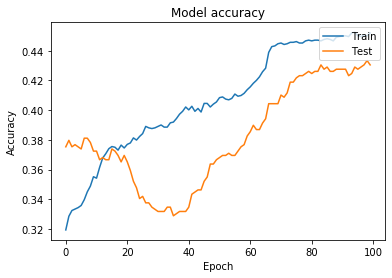

In [96]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### Evaluation

In [97]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0696827173233032
Test accuracy: 0.43043479323387146


In [98]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 114       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


In [99]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

22/22 [==============================] - 0s 2ms/step - loss: 1.0697 - accuracy: 0.4304
Mean squared error on test data:  1.0696827173233032
Mean absolute error on test data:  0.43043479323387146


Mean absolute error is 0.4 which shows that our algorithm is accurate and it can make good predictions. 

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


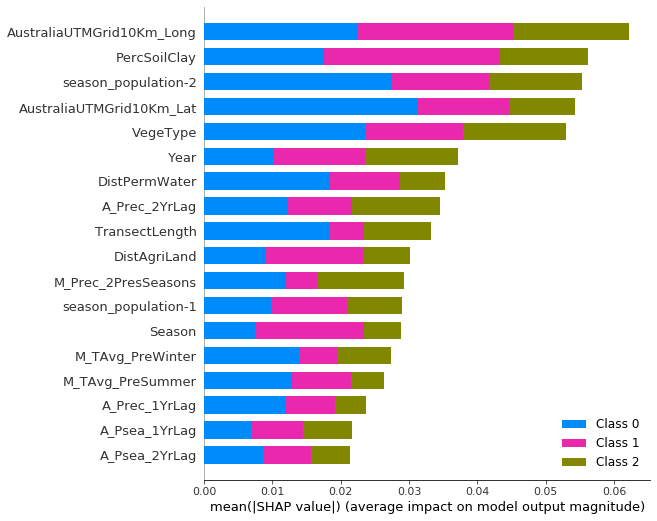

In [100]:
shap.initjs()
explainer = shap.DeepExplainer(model, X_train[:1000])
shap_values = explainer.shap_values(X_test[:1000])
shap.summary_plot(shap_values, X_test, plot_type='bar',feature_names=feature_columns)

The graph shows that 'Year' is our most significant featurs.

# Decision Tree<a id="part-12"></a>

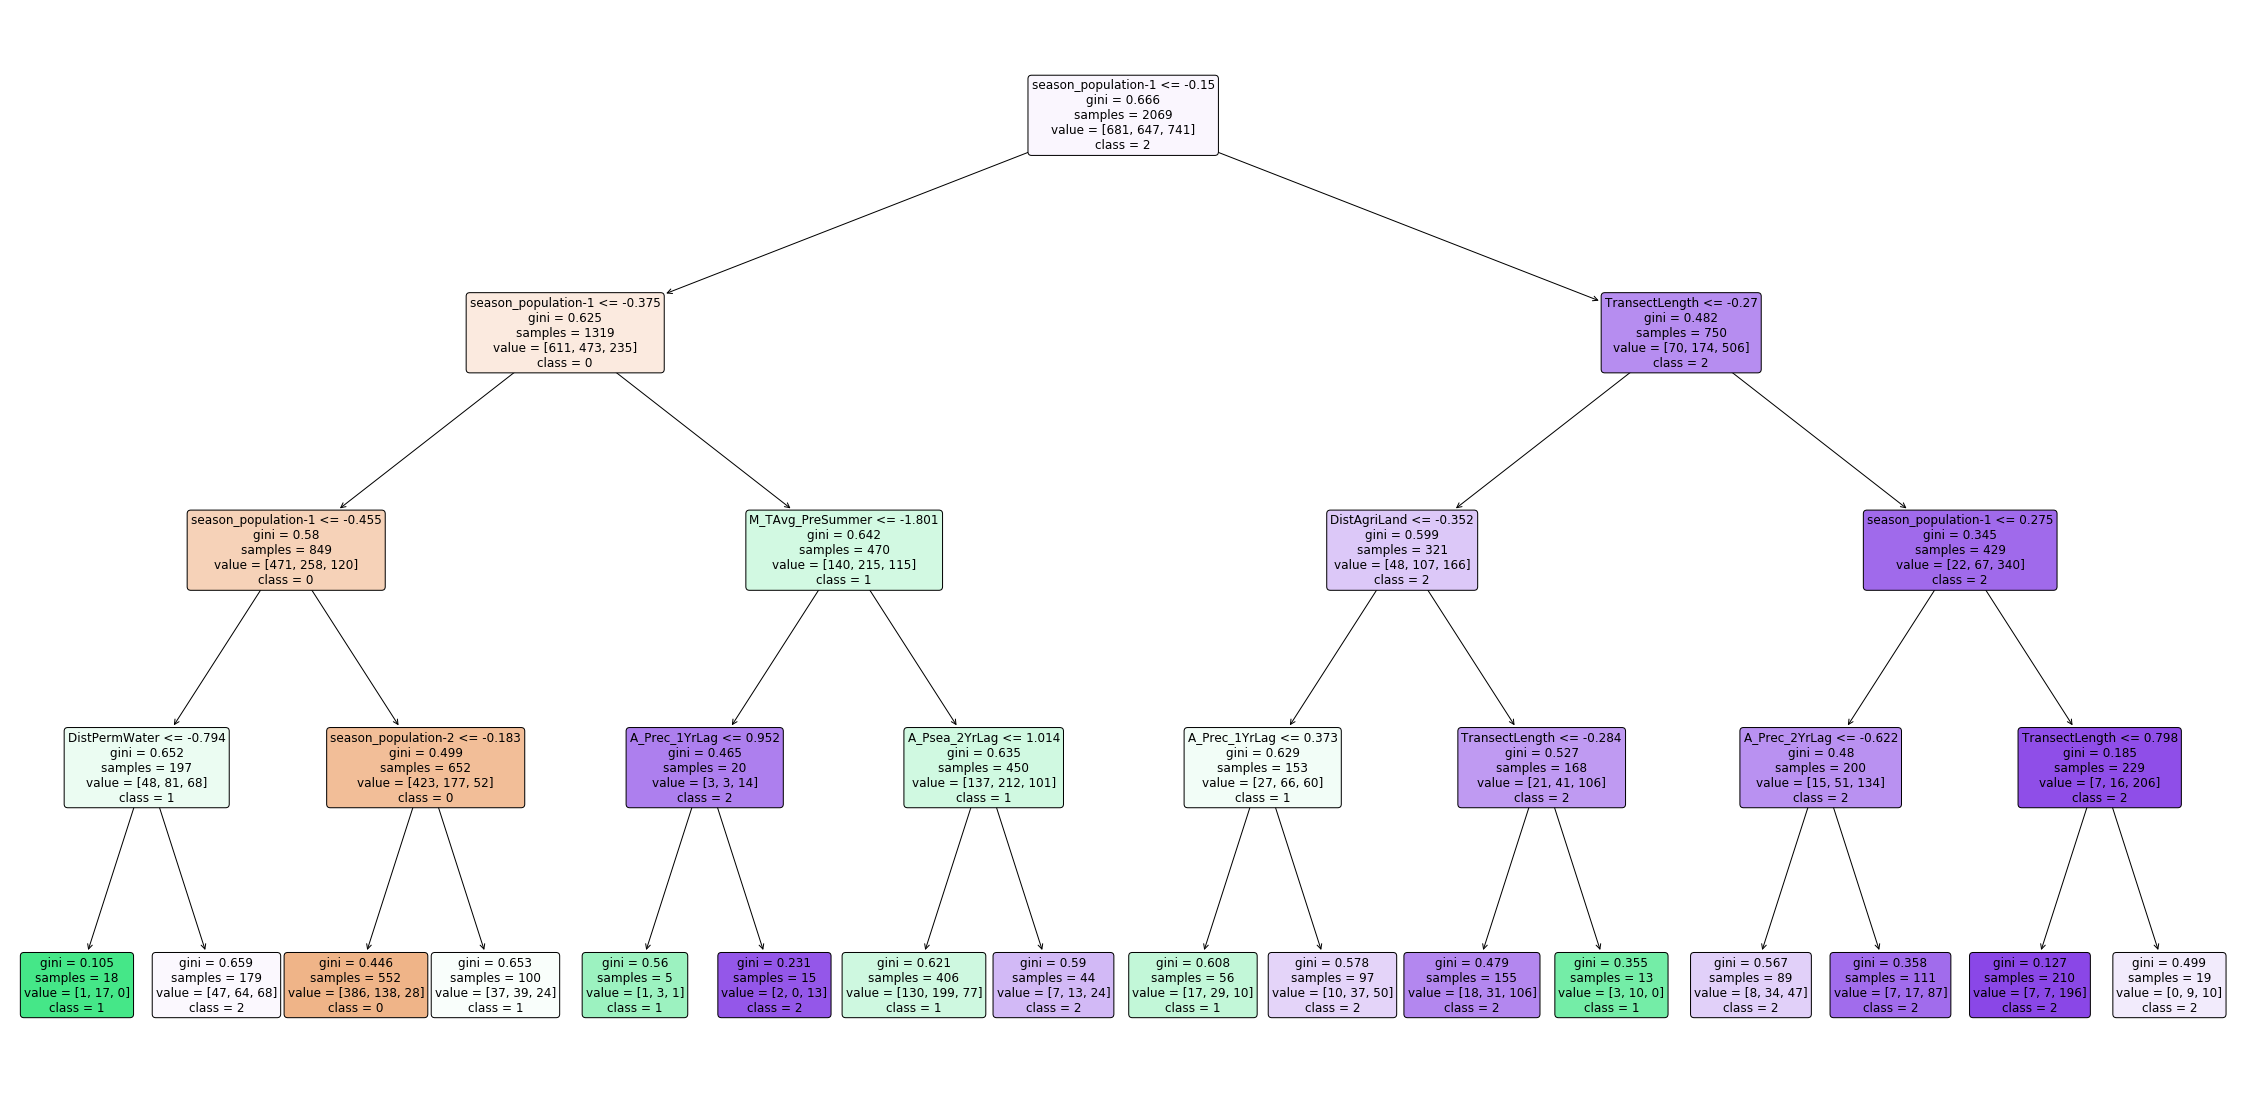

In [101]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

plt.figure(figsize=(40,20))
tree_dot= plot_tree(tree,feature_names=feature_columns,class_names=['0','1','2'],fontsize=12,filled=True,rounded = True)
plt.show()

### Evalauation

In [102]:
y_pred2= tree.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred2 )
print(cm)

[[ 73  66 163]
 [ 37  58 114]
 [  7  28 144]]


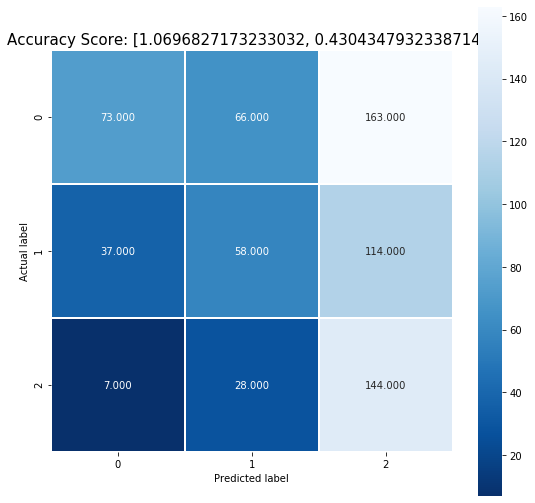

In [103]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

The matrix shows that our model can correctly classify class 0 and 2 but struggles to classify class 1.

In [104]:
# 3d dimenisoin w/ time
# LSTM
# density vs land surface area
# regression better
# baseline one year ago
# ARIMA history for a particular area
# random forest regressor
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.62      0.24      0.35       302
           1       0.38      0.28      0.32       209
           2       0.34      0.80      0.48       179

    accuracy                           0.40       690
   macro avg       0.45      0.44      0.38       690
weighted avg       0.48      0.40      0.37       690



## Milestone II Conclusions  

Model accuracies:  
**Logistic regression** score is: 0.4217391304347826  
**Random Forest** score is:       0.3318840579710145  
**NN** score:                     ranges from 28% and 48% accuracy  
**LSTM** score:                   ranges from 18% to 34% accuracy  
**Decision Tree** score is:       (102+50+156)/690 = 0.446 accuracy (ascertained from confusion matrix)  

**Logistic Regression**, **NN**, and **Decision Tree** are the best performing models.  

## Moving Forward

There's still a bit of work that needs to be done. We can improve our models by manipulating our data. Although difficult, it possible to engineer a lagged season_population. Finally, we still have to make a small test set to predict the season_population at different transects using its latitude/longitude coordinates, weather data and such preferrably for years 2022 and 2023 by plugging into our models.  

### Work Schedule for Milestone III  

*Dor*: Looking into papers about factors that affect detection of rabbits, biases in estimating relative abundance, and statistical approaches for analysis of the data.  
*Nihan + Michael*: Finishing the notebook by improving models, lagged features, and future predictions.  
*Asma*: Start on creating the presentation by looking into topics like rabbit behavior in the wild, invasive species research, math behind predicting population growth exc.  

## Milestone III Conclusions  

Model accuracies after implementing the lagged feature:  
**Logistic regression** score is: 0.5637  
**Random Forest** score is:       0.5942  
**NN** score:                     ranges from 32% and 46% accuracy  
**LSTM** score:                   REMOVED  
**Decision Tree** score is:       (144+58+73)/690 = 0.4 accuracy (ascertained from confusion matrix)  

**Logistic Regression**, **NN**, and **Decision Tree** are the best performing models. 

# Back to regression Models

In [105]:
X = df2[feature_columns]
y = df2[target_column]

# 75% train data, 25% test data
X_train, X_test, y_train, y_test = X.iloc[:2069 , :], X.iloc[2069: , :], y[:2069], y[2069:]

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Random Forest Regressor

In [106]:
rfr = RandomForestRegressor(random_state = 1)
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2','sqrt'], 'n_estimators': [3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 15,17,19,21,23,25,27,30,35,40,45,50]}
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 0, return_train_score=True)
result = g_search.fit(X_train, y_train);
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.23947167798578364
Best Hyperparameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 27}


In [107]:
rfr = RandomForestClassifier(bootstrap=True, max_depth=5, max_features='log2',n_estimators=27).fit(X_train,y_train)
rfr_pred = rfr.predict(X_test)

### Evaluation

In [108]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Linear_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Linear_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Linear_pred)))

Mean Absolute Error: 27.815269247887905
Mean Squared Error: 1672.3701507905948
Root Mean Squared Error: 40.89462251678813


# Application  

> It looks like our Logistic Regression and Random Forest works great. We'll stick to the Logistic Regression model since we're constrained by time. The government should look to regulate the rabbit population near dense human populations. Victoria is a great example. Take all the abundance records from 2016 within Victoria as baseline and all abundance records from 2017 within Victoria for comparison. Compare where the highest season_populations are expected to be for the two years. UPDATE: had to change it to 2012 and 2013 since a similar and substantial number of rows.

In [122]:
abundance = pd.read_csv('SI2_DataAbundance.zip', low_memory=False)
abundance= abundance[abundance['AustraliaState']=='VIC']
# Relevant features
abundance=abundance[['Year', 'Season', 'AustraliaUTMGrid10Km_Long',
       'AustraliaUTMGrid10Km_Lat', 'TransectLength', 'VegeType',
       'DistPermWater', 'DistAgriLand', 'PercSoilClay', 'M_TAvg_PreSummer',
       'M_TAvg_PreWinter', 'M_Prec_2PresSeasons', 'A_Prec_1YrLag',
       'A_Prec_2YrLag', 'A_Psea_1YrLag', 'A_Psea_2YrLag']]
abundance=abundance.dropna()
VIC_2011=abundance[abundance['Year']==2011]
VIC_2012=abundance[abundance['Year']==2012]
print("The respective row counts for 2011 and 2012 in VIC are:",VIC_2011.shape[0],VIC_2012.shape[0])

The respective row counts for 2011 and 2012 in VIC are: 1859 1975


In [123]:
# Find season_population for VIC_2011. Make the lagged-1 version.
# Append these two season_populations as features to VIC_2013. 
# Get the target list as output by inputting VIC_2012 to the LR model.
# Find out which were the most populated locations.